# Figure Generation

*Code to generate the figures from the data generated from the other notebooks.*

Olivia Yoo

Neuro 140 Final Project

May 5, 2023

In [1]:
%matplotlib inline
import os
import random
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [2]:
ROIS = np.arange(4)
N_ROIS = 4
ROI_NAMES = ['lFFA', 'rFFA', 'lPPA', 'rPPA']
SUBJECTS = ['BE', 'KO', 'SN', 'TI']
N_SUBJECTS = 4
BINSIZE = [11, 12, 11, 12, 22, 24]
ORDERED_CATEGORIES = ['human face', 'human body part', 'nonhuman face', 'nonhuman body part', 'natural inanimate', 'artificial inanimate']

# Import data

## RDMs

### Human data

In [3]:
HUMAN_PATH = os.path.dirname(os.getcwd()) + '/data/colab_data/human_data.npy'
HUMAN_PERM_PATH = os.path.dirname(os.getcwd()) + '/data/colab_data/human_permuted.npz'

In [4]:
# HUMAN RDMS
human_data = np.load(HUMAN_PATH)
human_rdms = human_data[1:][0]

In [5]:
# PERMUTED HUMAN RDMS
human_perm_data = np.load(HUMAN_PERM_PATH)
human_perm_data = np.array([human_perm_data['lffa'], human_perm_data['rffa'],human_perm_data['lppa'], human_perm_data['rppa']])

### CNN data

In [6]:
FIGURE_PATH = os.path.dirname(os.getcwd()) + '/data/figures'

In [7]:
CNN_RDM_PATH = os.path.dirname(os.getcwd()) + '/data/cnn_data'

In [8]:
ALEXNET_PATH = CNN_RDM_PATH + '/alexnet_rdms.npy'
RN18_PATH = CNN_RDM_PATH + '/rn18_rdms.npy'
RN34_PATH = CNN_RDM_PATH + '/rn34_rdms.npy'
RN50_PATH = CNN_RDM_PATH + '/rn50_rdm.npy'
RN50_MOD_PATH = CNN_RDM_PATH + '/rn50_mod_rdm.npy'
RN101_PATH = CNN_RDM_PATH + '/rn101_rdm.npy'
RN101_MOD_PATH = CNN_RDM_PATH + '/rn101_mod_rdm.npy'
RN152_PATH = CNN_RDM_PATH + '/rn152_rdm.npy'
RN152_MOD_PATH = CNN_RDM_PATH + '/rn152_mod_rdm.npy'

In [9]:
alexnet_rdms = np.load(ALEXNET_PATH)
alexnet_rdms.shape

(2, 8, 92, 92)

In [10]:
rn18_rdms = np.load(RN18_PATH)
rn18_rdms.shape

(2, 21, 92, 92)

In [11]:
rn34_rdms = np.load(RN34_PATH)
rn34_rdms.shape

(2, 37, 92, 92)

In [12]:
rn50_rdm = np.load(RN50_PATH)
rn50_mod_rdm = np.load(RN50_MOD_PATH)
rn50_rdms = np.asarray([rn50_rdm, rn50_mod_rdm])
rn50_rdms.shape

(2, 54, 92, 92)

In [13]:
rn101_rdm = np.load(RN101_PATH)
rn101_mod_rdm = np.load(RN101_MOD_PATH)
rn101_rdms = np.asarray([rn101_rdm, rn101_mod_rdm])
rn101_rdms.shape

(2, 105, 92, 92)

In [14]:
rn152_rdm = np.load(RN152_PATH)
rn152_mod_rdm = np.load(RN152_MOD_PATH)
rn152_rdms = np.asarray([rn152_rdm, rn152_mod_rdm])
rn152_rdms.shape

(2, 156, 92, 92)

## Mapping data

In [15]:
MAP_DATA_PATH = os.path.dirname(os.getcwd()) + '/data/mapping'

In [16]:
# normal image human/CNN maps
alexnet_map = np.load(MAP_DATA_PATH + '/alexnet_map.npy')
rn18_map = np.load(MAP_DATA_PATH + '/rn18_map.npy')
rn34_map = np.load(MAP_DATA_PATH + '/rn34_map.npy')
rn50_map = np.load(MAP_DATA_PATH + '/rn50_map.npy')
rn101_map = np.load(MAP_DATA_PATH + '/rn101_map.npy')
rn152_map = np.load(MAP_DATA_PATH + '/rn152_map.npy')

In [17]:
# MODIFIED image human/CNN maps
alexnet_mod_map = np.load(MAP_DATA_PATH + '/alexnet_mod_map.npy')
rn18_mod_map = np.load(MAP_DATA_PATH + '/rn18_mod_map.npy')
rn34_mod_map = np.load(MAP_DATA_PATH + '/rn34_mod_map.npy')
rn50_mod_map = np.load(MAP_DATA_PATH + '/rn50_mod_map.npy')
rn101_mod_map = np.load(MAP_DATA_PATH + '/rn101_mod_map.npy')
rn152_mod_map = np.load(MAP_DATA_PATH + '/rn152_mod_map.npy')

In [18]:
# CNN layer correlations
alexnet_mod_map = np.load(MAP_DATA_PATH + '/alexnet_mod_map.npy')
rn18_mod_map = np.load(MAP_DATA_PATH + '/rn18_mod_map.npy')
rn34_mod_map = np.load(MAP_DATA_PATH + '/rn34_mod_map.npy')
rn50_mod_map = np.load(MAP_DATA_PATH + '/rn50_mod_map.npy')
rn101_mod_map = np.load(MAP_DATA_PATH + '/rn101_mod_map.npy')
rn152_mod_map = np.load(MAP_DATA_PATH + '/rn152_mod_map.npy')

# Visualize RDMs

In [20]:
# Plot a single RDM
def plot_rdm(rdm, title='', save=False, save_name=''):
  
  # plot
  fig, ax = plt.subplots(1, 1, figsize=(8,7))

  plt.imshow(rdm, cmap='jet', vmin=0, vmax=100)
  cbar = plt.colorbar()

  cbar.set_label('Dissimilarity \n [percentile of 1-r]', rotation=90)

  edges = np.concatenate([np.asarray([0]), np.cumsum(BINSIZE)])[:-1]
  ax.set_xticks(list(np.array(edges)+4))
  ax.set_xticklabels(ORDERED_CATEGORIES, rotation = 90)
  ax.set_yticks(list(np.array(edges)+4))
  ax.set_yticklabels(ORDERED_CATEGORIES)
  ax.vlines(edges,0,92, color='black')
  ax.hlines(edges,0,92, color='black')
  ax.set_title(title)
  
  # save
  if save:
    plt.savefig(save_name, dpi=300, bbox_inches='tight')

  plt.show()
  return

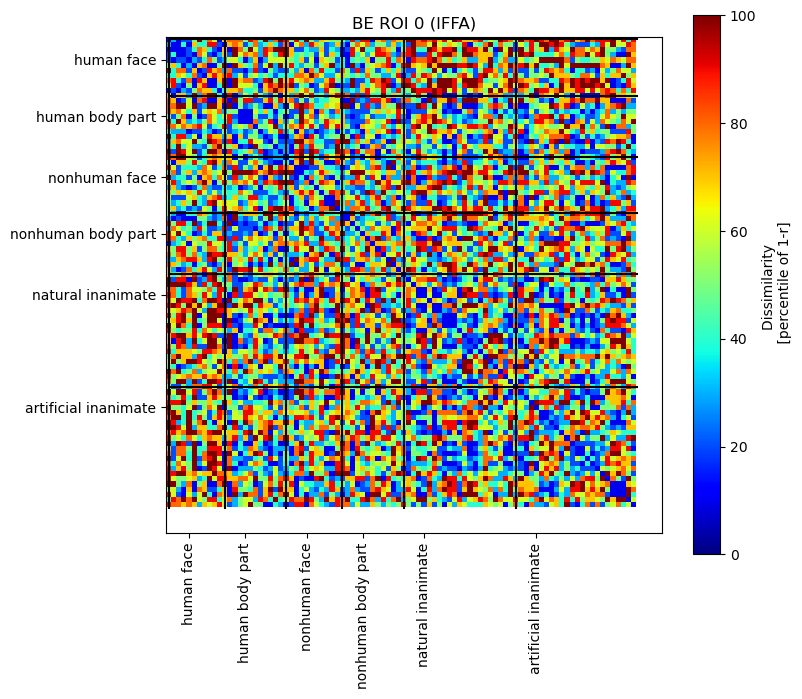

In [33]:
plot_rdm(human_rdms[0,0], title="BE ROI 0 (lFFA)", save=True, save_name=FIGURE_PATH + '/sample_human_rdm.png')

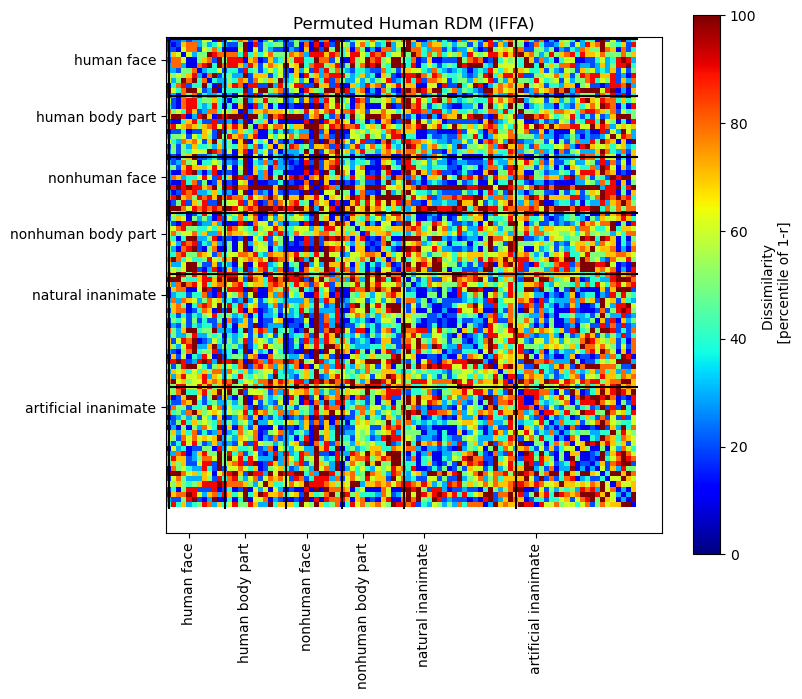

In [34]:
plot_rdm(human_perm_data[0,0], title="Permuted Human RDM (lFFA)", save=True, save_name=FIGURE_PATH + '/sample_mod_rdm.png')

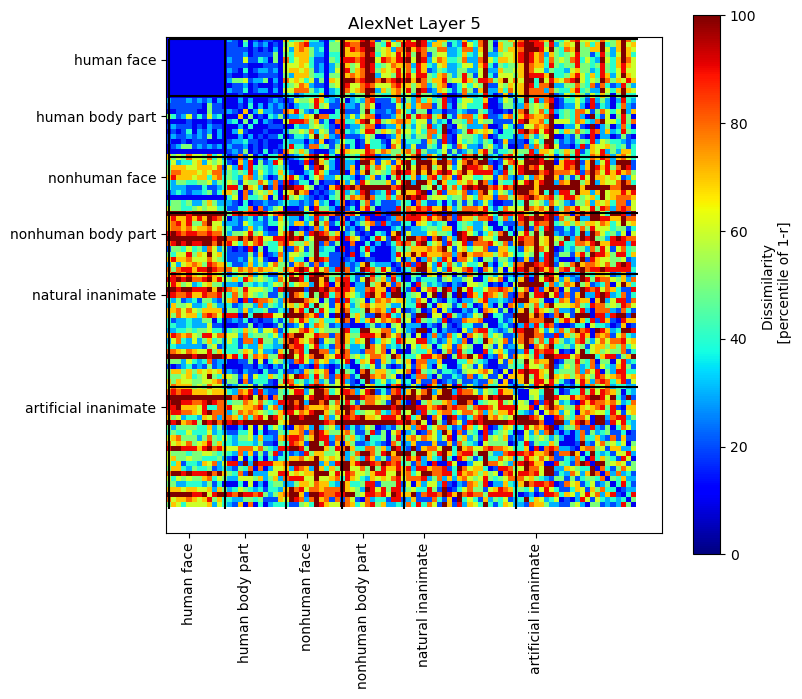

In [45]:
plot_rdm(alexnet_rdms[0,4], title="AlexNet Layer 5", save=True, save_name=FIGURE_PATH + '/sample_alexnet_rdm.png')

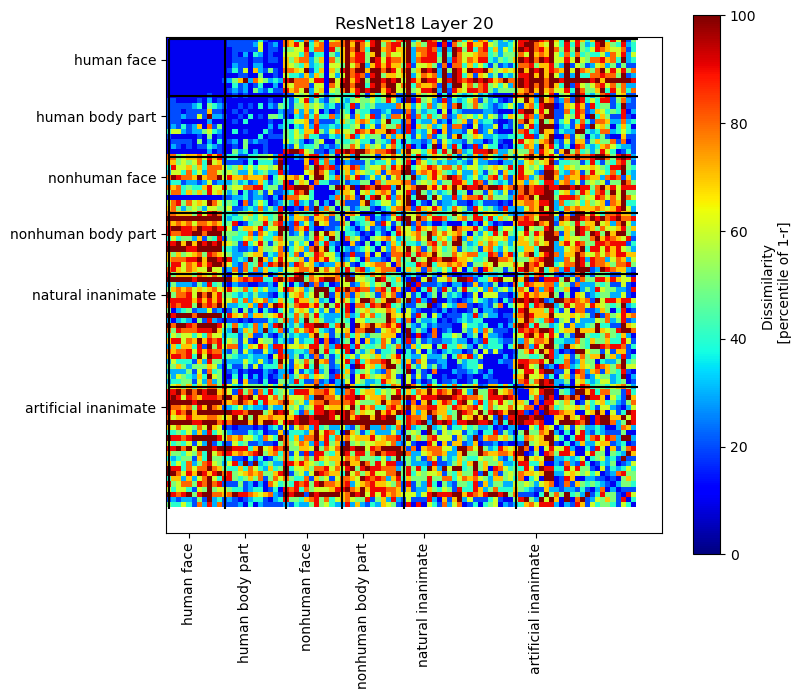

In [32]:
plot_rdm(rn18_rdms[0,19], title="ResNet18 Layer 20", save=True, save_name=FIGURE_PATH + '/sample_rn18_rdm.png')

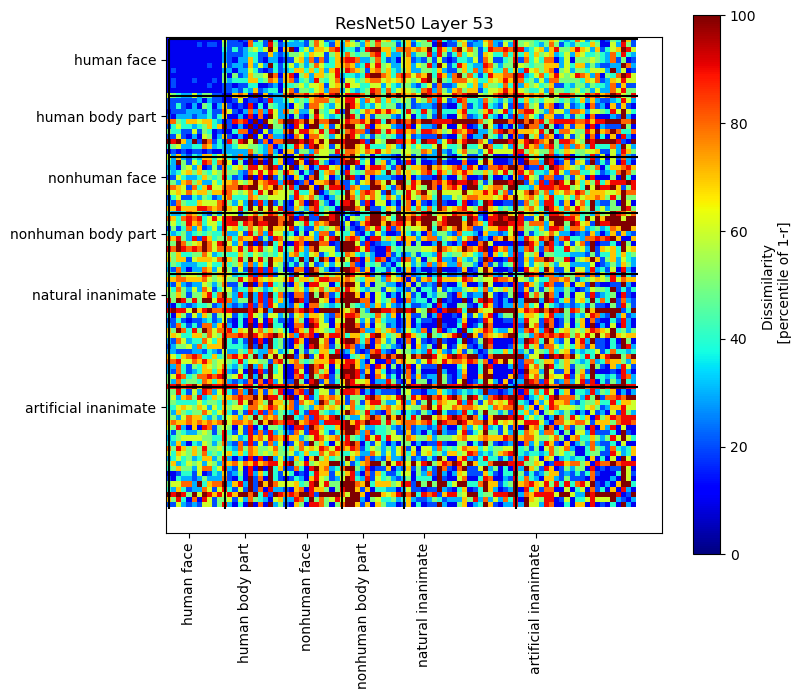

In [35]:
plot_rdm(rn50_rdms[0,52], title="ResNet50 Layer 53", save=True, save_name=FIGURE_PATH + '/sample_rn50_rdm.png')

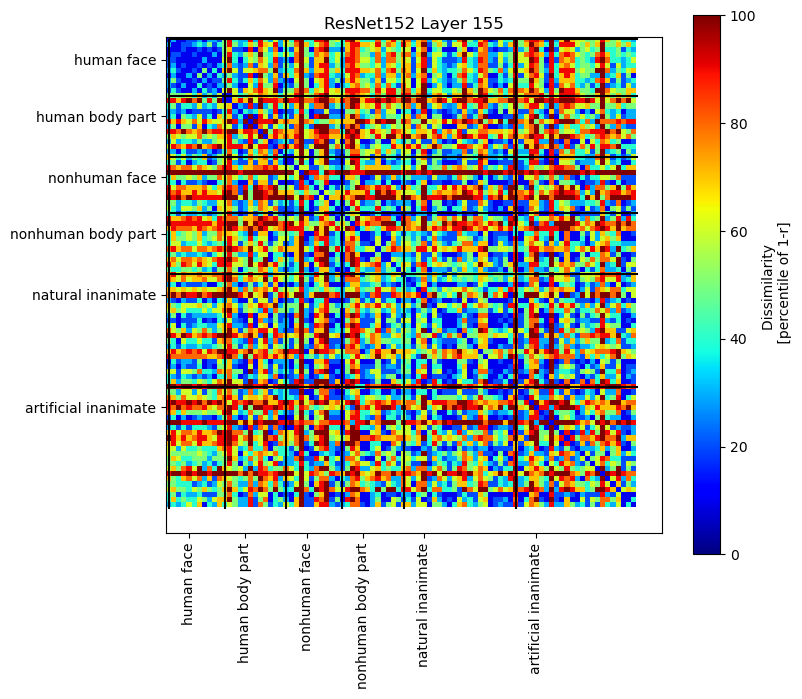

In [36]:
plot_rdm(rn152_rdms[0,154], title="ResNet152 Layer 155", save=True, save_name=FIGURE_PATH + '/sample_rn152_rdm.png')

# Visualize human/CNN maps

## Function

In [19]:
def viz_human_cnn_map(network_map, network_name, save=False, save_name='', width=18, height=6):
    
    # create heatmap
    fig, ax = plt.subplots(figsize=(width, height))
    heatmap = ax.imshow(network_map, cmap='bwr', vmin=-0.15, vmax=0.15)

    # add value annotations to each cell
    for i in range(network_map.shape[0]):
        for j in range(network_map.shape[1]):
            ax.annotate(str(round(network_map[i,j], 2)), xy=(j, i),
                        horizontalalignment='center', verticalalignment='center')
    
    # add colorbar
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    cbar.set_label('Spearman correlation', rotation=90)

    # set axis labels
    ax.set_xticks(np.arange(network_map.shape[1]))
    ax.set_yticks(np.arange(network_map.shape[0]))
    ax.set_xticklabels(np.arange(1,network_map.shape[1] + 1))
    ax.set_yticklabels(ROI_NAMES)
    ax.set_xlabel(network_name + ' Layers')
    ax.set_ylabel('IT Cortex Area')

    # set title
    ax.set_title(network_name + " Mapping to Human IT Cortex")

    # save
    if save:
        plt.savefig(save_name)

    plt.show()


### AlexNet (normal)

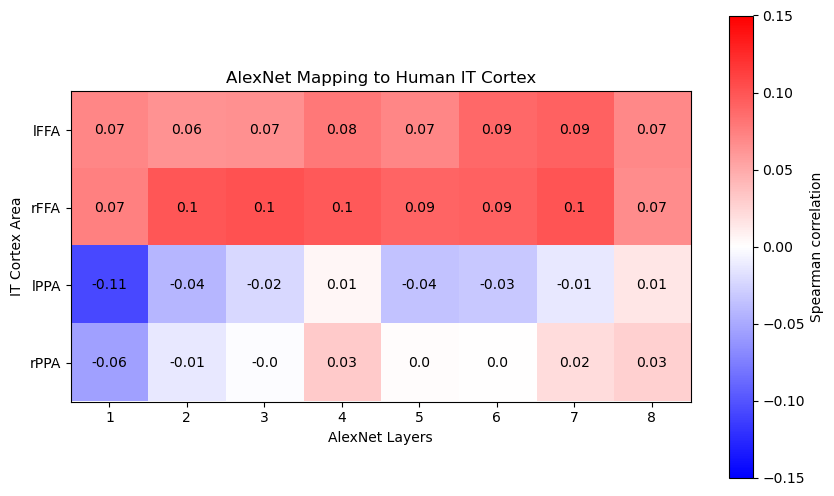

In [20]:
save_path = FIGURE_PATH + '/alexnet_human_map.png'
viz_human_cnn_map(alexnet_map, 'AlexNet', save=True, save_name=save_path, width=10)

### AlexNet (modified)

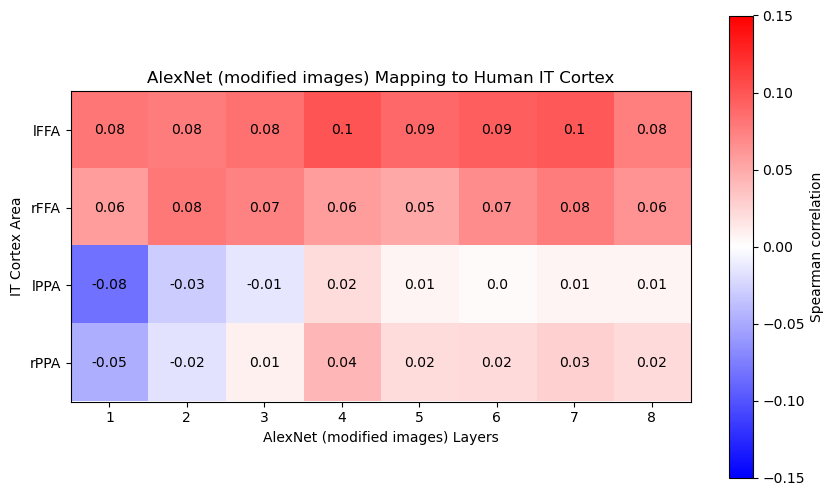

In [21]:
save_path = FIGURE_PATH + '/alexnet_human_mod_map.png'
viz_human_cnn_map(alexnet_mod_map, 'AlexNet (modified images)', save=True, save_name=save_path, width=10)

### ResNet18 (normal)

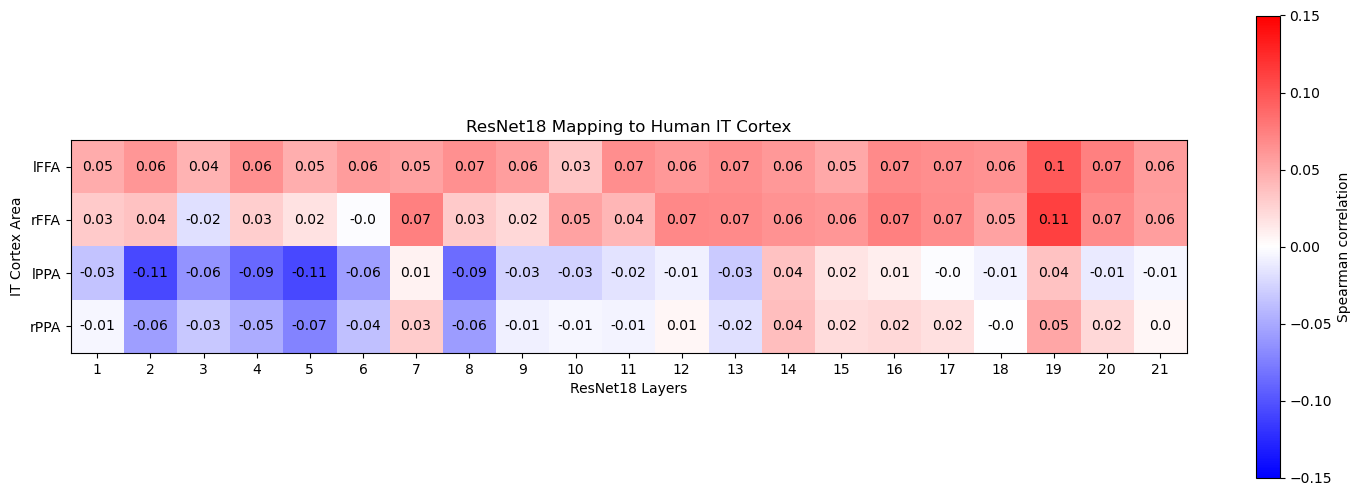

In [22]:
save_path = FIGURE_PATH + '/rn18_human_map.png'
viz_human_cnn_map(rn18_map, 'ResNet18', save=True, save_name=save_path)

### ResNet18 (modified)

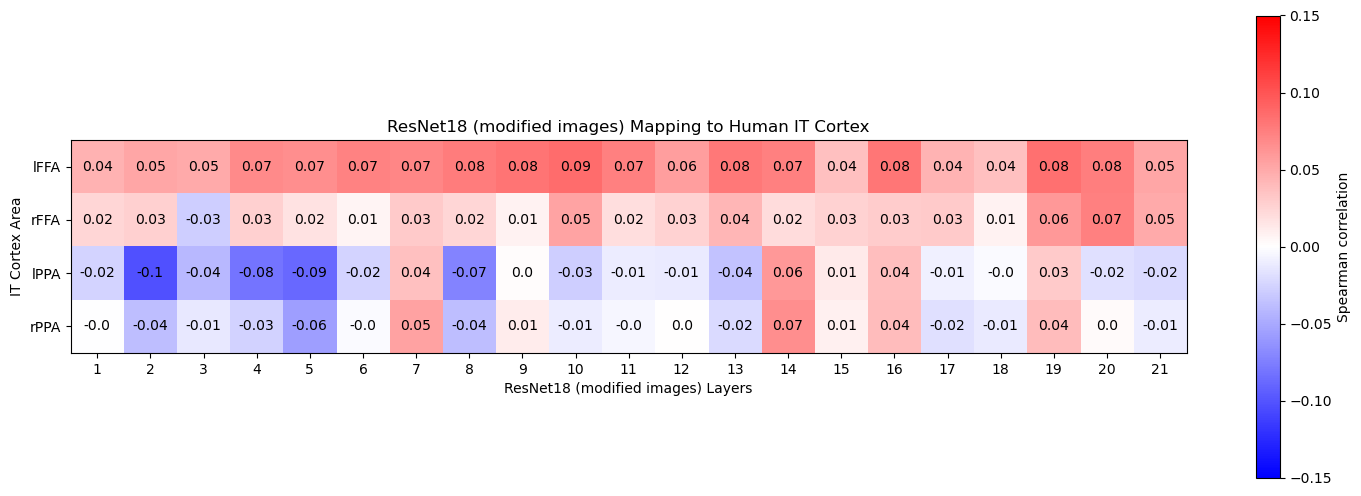

In [23]:
save_path = FIGURE_PATH + '/rn18_human_mod_map.png'
viz_human_cnn_map(rn18_mod_map, 'ResNet18 (modified images)', save=True, save_name=save_path)

### ResNet34 (normal)

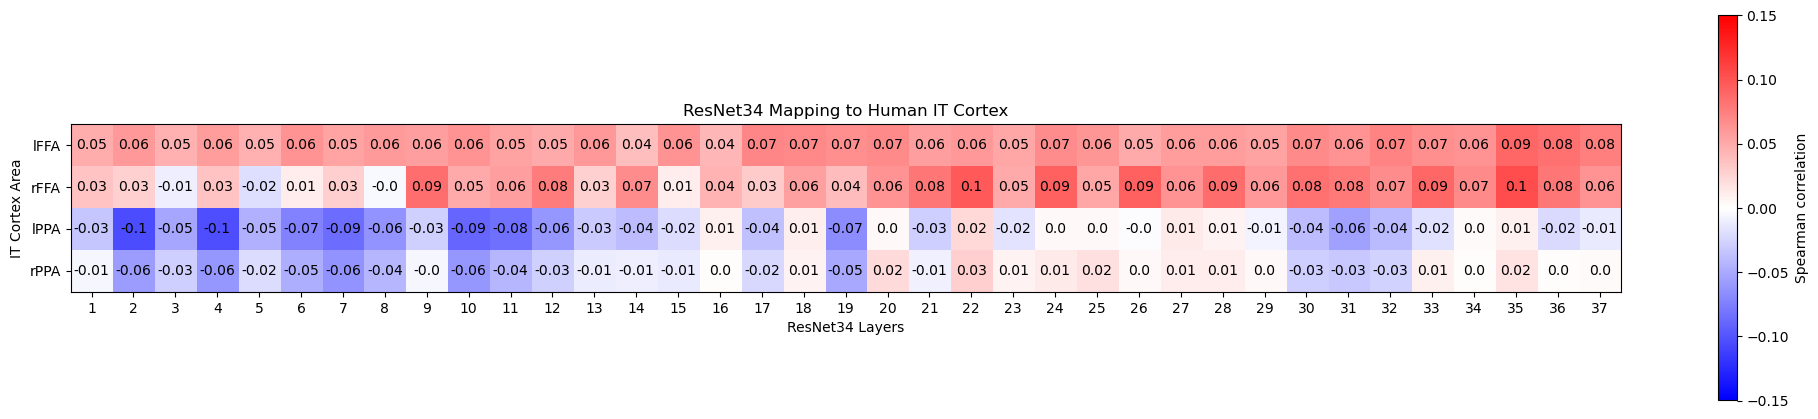

In [24]:
save_path = FIGURE_PATH + '/rn34_human_map.png'
viz_human_cnn_map(rn34_map, 'ResNet34', save=True, save_name=save_path, width=25, height=5)

### ResNet34 (modified)

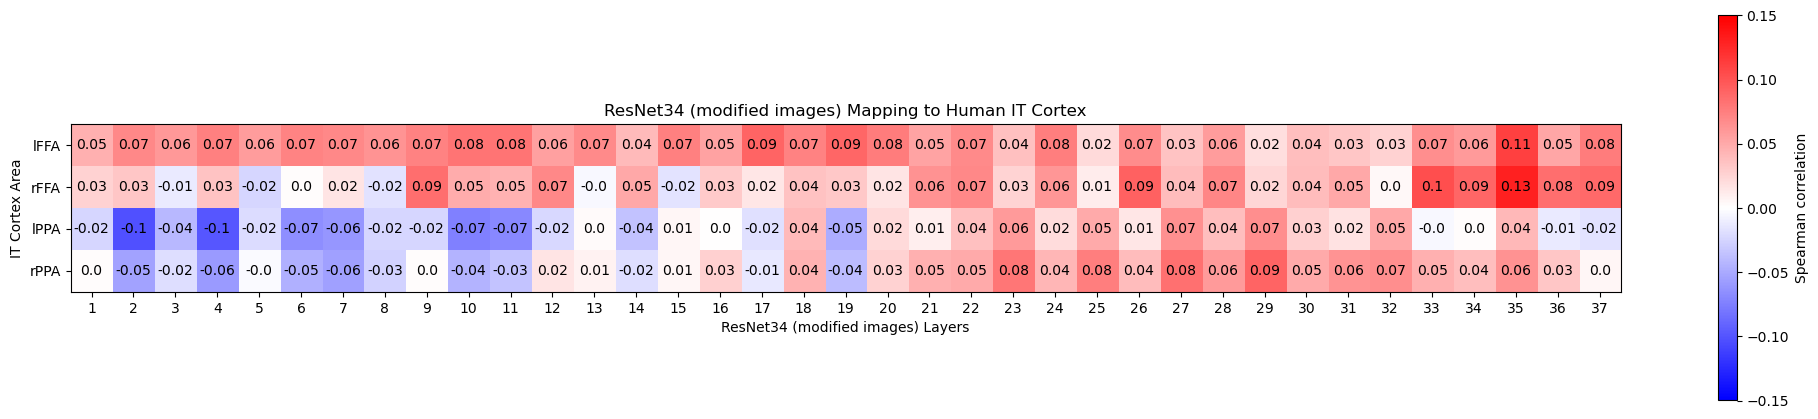

In [25]:
save_path = FIGURE_PATH + '/rn34_human_mod_map.png'
viz_human_cnn_map(rn34_mod_map, 'ResNet34 (modified images)', save=True, save_name=save_path, width=25, height=5)

### ResNet50 (normal)

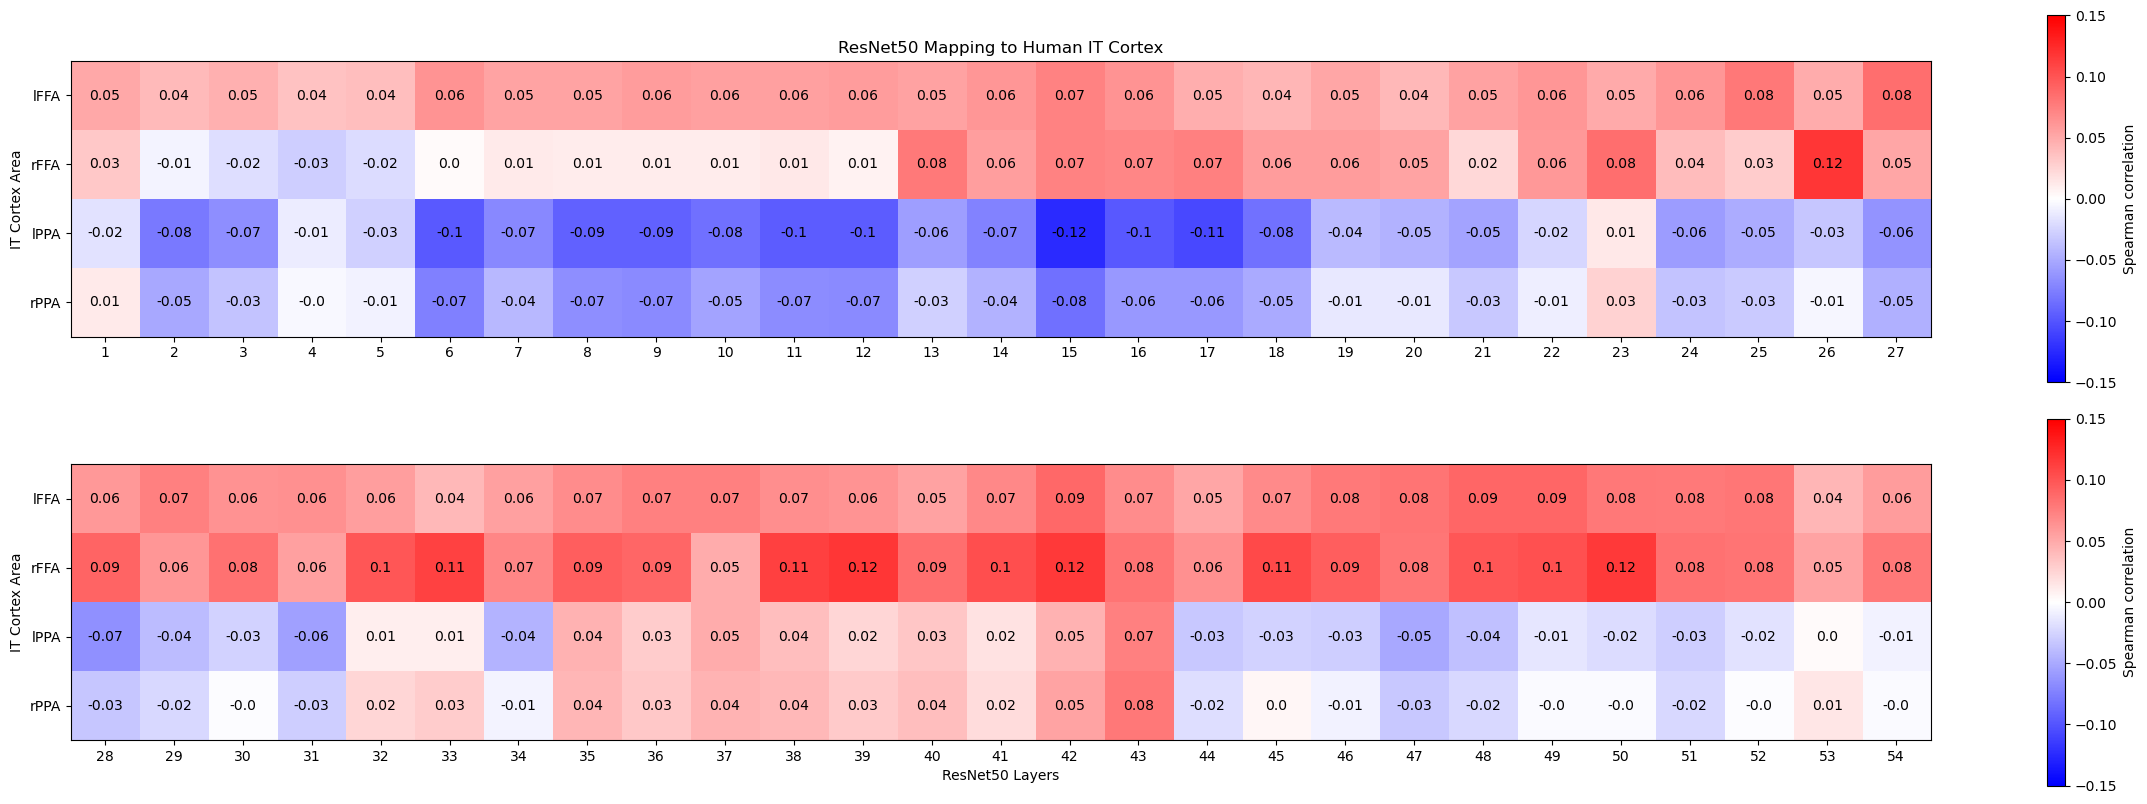

In [26]:
# create plot with subplots
fig, axs = plt.subplots(2,1, figsize=(30, 10))

# FIRST HEATMAP 
data_split1 = rn50_map[:, 0:27]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn50_map[:, 27:]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(28, 55))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_xlabel('ResNet50 Layers')
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet50 Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn50_human_map.png'
plt.savefig(save_path)

plt.show()


### ResNet50 (modified)

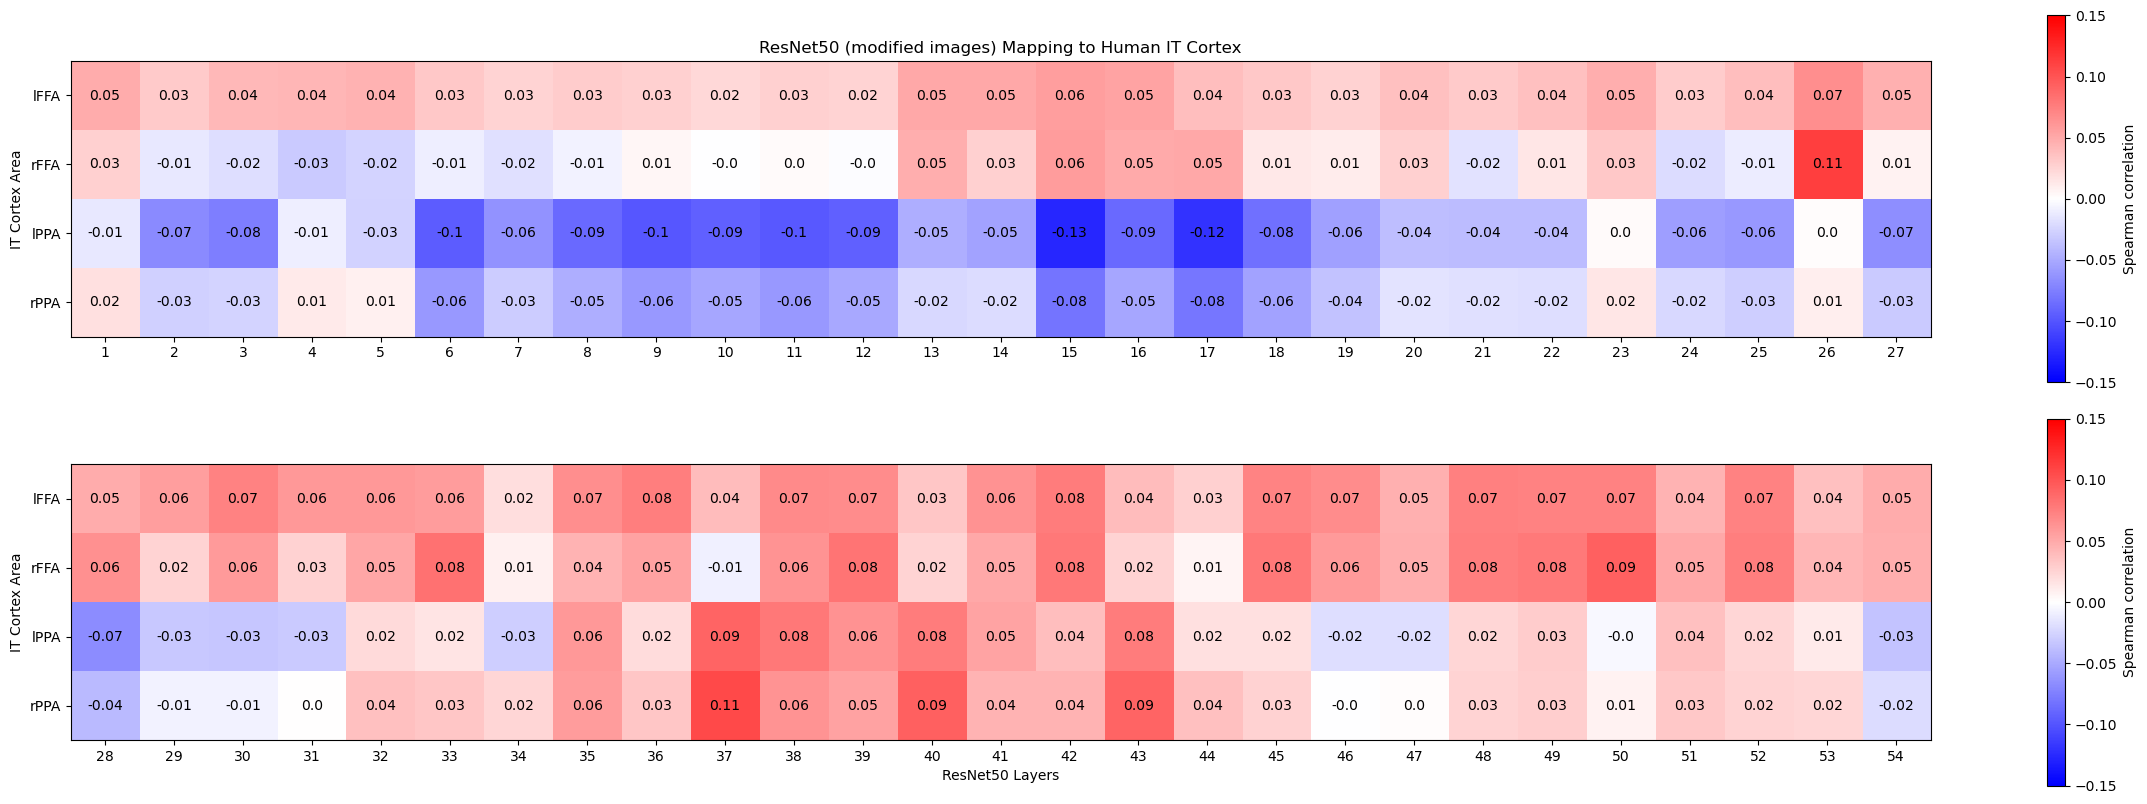

In [27]:
# create plot with subplots
fig, axs = plt.subplots(2,1, figsize=(30, 10))

# FIRST HEATMAP 
data_split1 = rn50_mod_map[:, 0:27]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn50_mod_map[:, 27:]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(28, 55))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_xlabel('ResNet50 Layers')
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet50 (modified images) Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn50_human_mod_map.png'
plt.savefig(save_path)

plt.show()

### ResNet101 (normal)

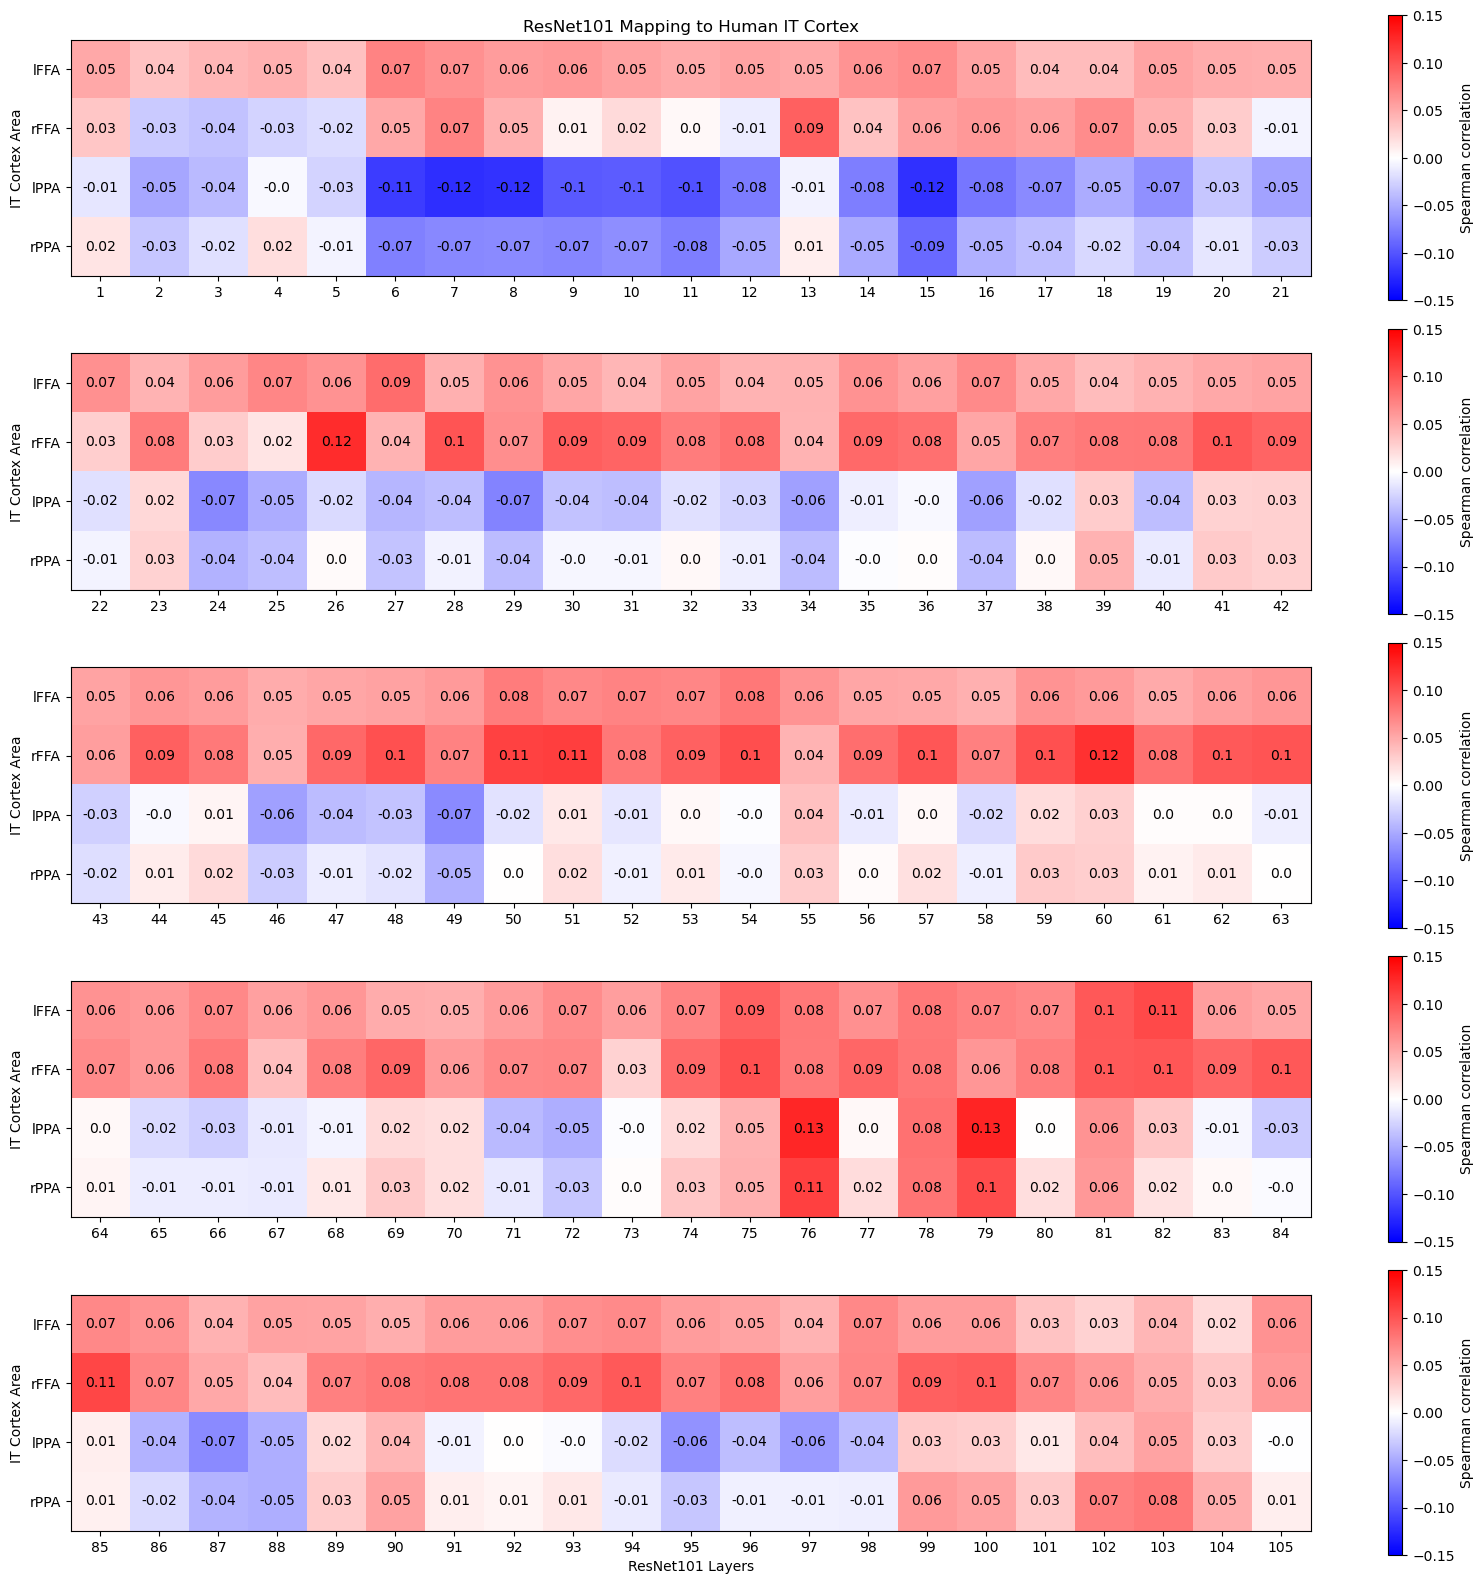

In [23]:
# create plot with subplots
fig, axs = plt.subplots(5,1, figsize=(20, 20))

# FIRST HEATMAP 
data_split1 = rn101_map[:, 0:21]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn101_map[:, 21:42]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(22, 43))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# THIRD HEATMAP
data_split3 = rn101_map[:, 42:63]
hm3 = axs[2].imshow(data_split3, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[2].set_xticks(np.arange(data_split3.shape[1]))
axs[2].set_yticks(np.arange(data_split3.shape[0]))
axs[2].set_xticklabels(np.arange(43, 64))
axs[2].set_yticklabels(ROI_NAMES)
axs[2].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split3.shape[0]):
    for j in range(data_split3.shape[1]):
        axs[2].annotate(str(round(data_split3[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FOURTH HEATMAP
data_split4 = rn101_map[:, 63:84]
hm4 = axs[3].imshow(data_split4, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[3].set_xticks(np.arange(data_split4.shape[1]))
axs[3].set_yticks(np.arange(data_split4.shape[0]))
axs[3].set_xticklabels(np.arange(64, 85))
axs[3].set_yticklabels(ROI_NAMES)
axs[3].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split4.shape[0]):
    for j in range(data_split4.shape[1]):
        axs[3].annotate(str(round(data_split4[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FIFTH HEATMAP
data_split5 = rn101_map[:, 84:]
hm5 = axs[4].imshow(data_split5, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[4].set_xticks(np.arange(data_split5.shape[1]))
axs[4].set_yticks(np.arange(data_split5.shape[0]))
axs[4].set_xticklabels(np.arange(85, 106))
axs[4].set_yticklabels(ROI_NAMES)
axs[4].set_xlabel('ResNet101 Layers')
axs[4].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split5.shape[0]):
    for j in range(data_split5.shape[1]):
        axs[4].annotate(str(round(data_split5[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')
cbar3 = fig.colorbar(hm3, ax=axs[2])
cbar3.set_label('Spearman correlation')
cbar4 = fig.colorbar(hm4, ax=axs[3])
cbar4.set_label('Spearman correlation')
cbar5 = fig.colorbar(hm4, ax=axs[4])
cbar5.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet101 Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn101_human_map.png'
plt.savefig(save_path)

plt.show()

### ResNet101 (modified)

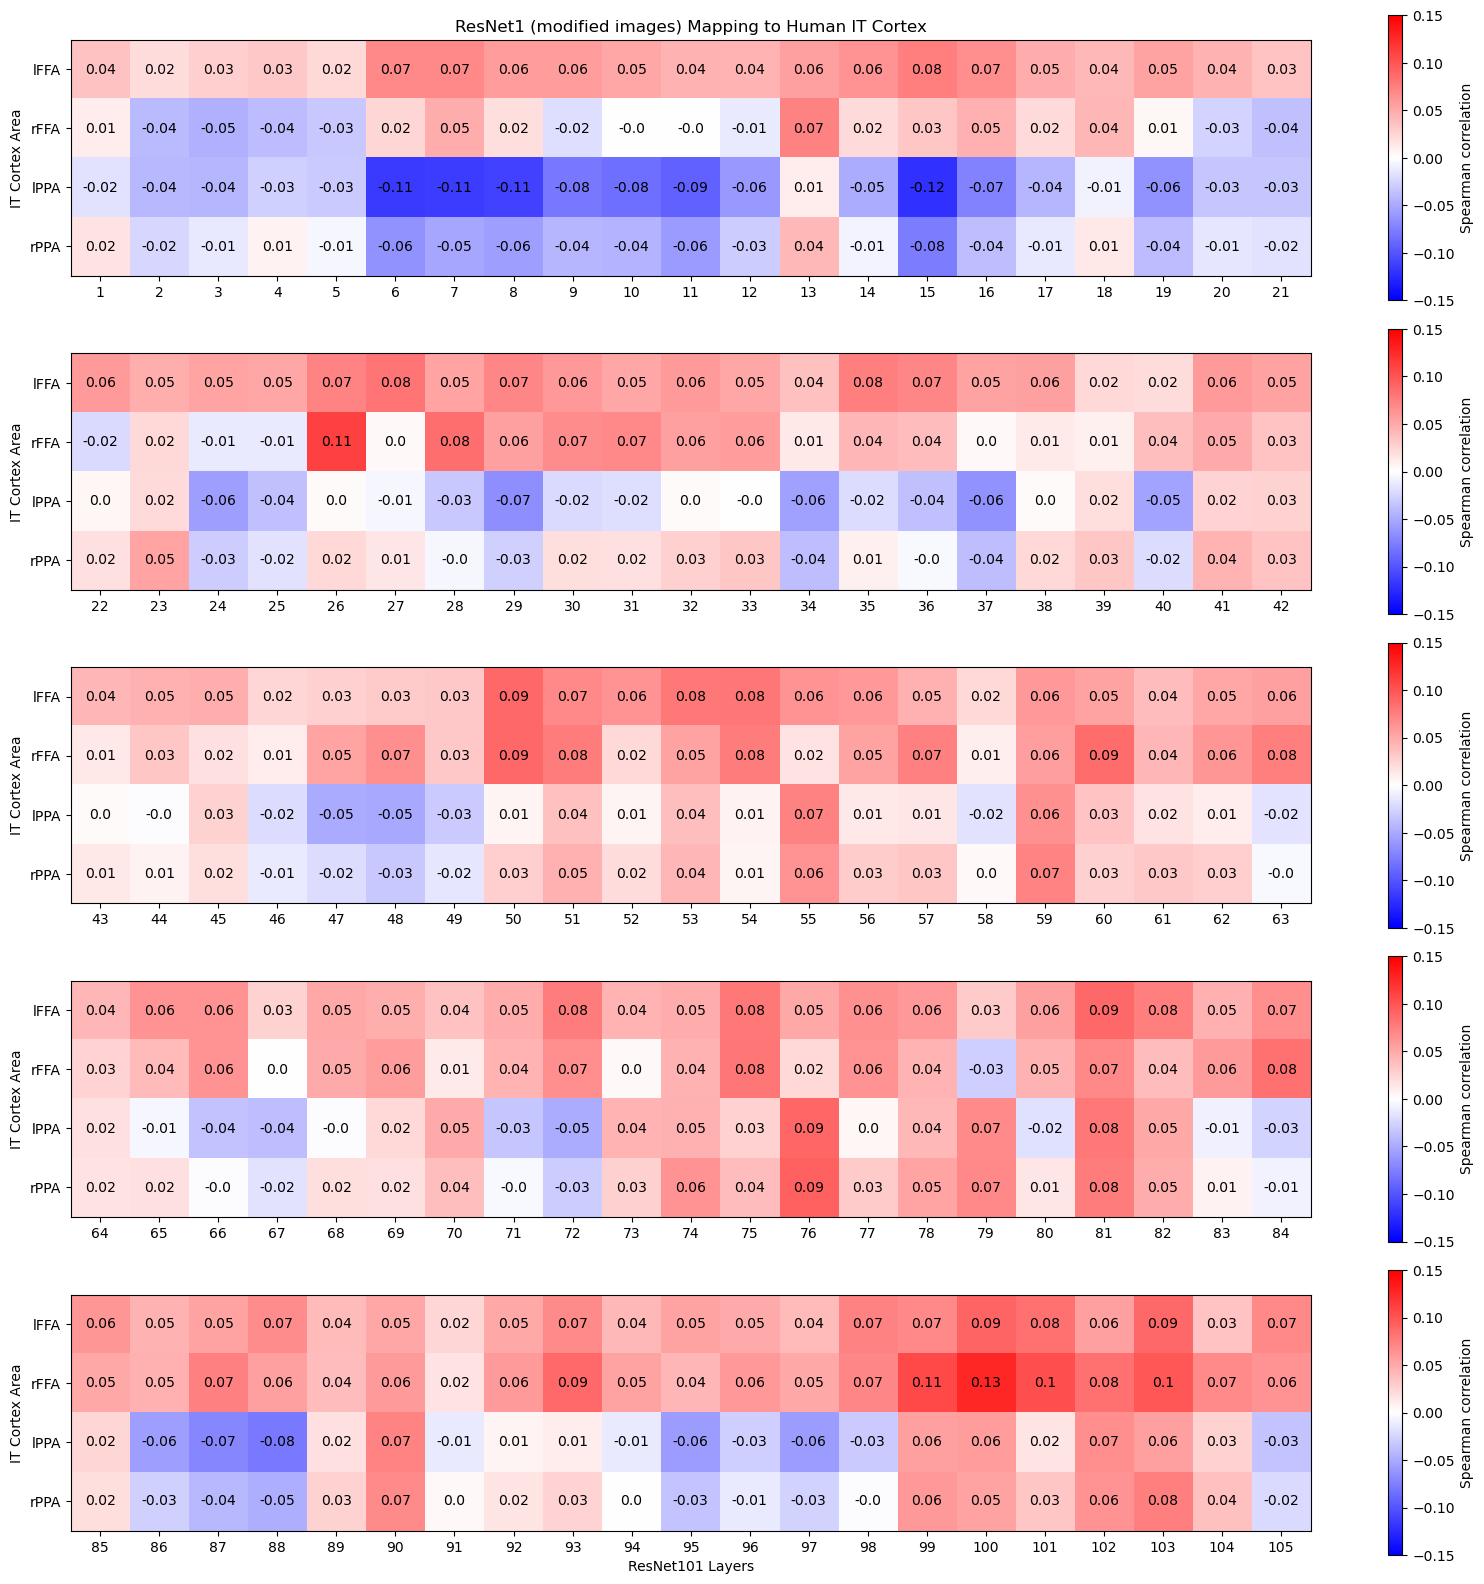

In [24]:
# create plot with subplots
fig, axs = plt.subplots(5,1, figsize=(20, 20))

# FIRST HEATMAP 
data_split1 = rn101_mod_map[:, 0:21]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn101_mod_map[:, 21:42]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(22, 43))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# THIRD HEATMAP
data_split3 = rn101_mod_map[:, 42:63]
hm3 = axs[2].imshow(data_split3, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[2].set_xticks(np.arange(data_split3.shape[1]))
axs[2].set_yticks(np.arange(data_split3.shape[0]))
axs[2].set_xticklabels(np.arange(43, 64))
axs[2].set_yticklabels(ROI_NAMES)
axs[2].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split3.shape[0]):
    for j in range(data_split3.shape[1]):
        axs[2].annotate(str(round(data_split3[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FOURTH HEATMAP
data_split4 = rn101_mod_map[:, 63:84]
hm4 = axs[3].imshow(data_split4, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[3].set_xticks(np.arange(data_split4.shape[1]))
axs[3].set_yticks(np.arange(data_split4.shape[0]))
axs[3].set_xticklabels(np.arange(64, 85))
axs[3].set_yticklabels(ROI_NAMES)
axs[3].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split4.shape[0]):
    for j in range(data_split4.shape[1]):
        axs[3].annotate(str(round(data_split4[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FIFTH HEATMAP
data_split5 = rn101_mod_map[:, 84:]
hm5 = axs[4].imshow(data_split5, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[4].set_xticks(np.arange(data_split5.shape[1]))
axs[4].set_yticks(np.arange(data_split5.shape[0]))
axs[4].set_xticklabels(np.arange(85, 106))
axs[4].set_yticklabels(ROI_NAMES)
axs[4].set_xlabel('ResNet101 Layers')
axs[4].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split5.shape[0]):
    for j in range(data_split5.shape[1]):
        axs[4].annotate(str(round(data_split5[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')
cbar3 = fig.colorbar(hm3, ax=axs[2])
cbar3.set_label('Spearman correlation')
cbar4 = fig.colorbar(hm4, ax=axs[3])
cbar4.set_label('Spearman correlation')
cbar5 = fig.colorbar(hm4, ax=axs[4])
cbar5.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet1 (modified images) Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn101_human_mod_map.png'
plt.savefig(save_path)

plt.show()

### ResNet152 (normal)

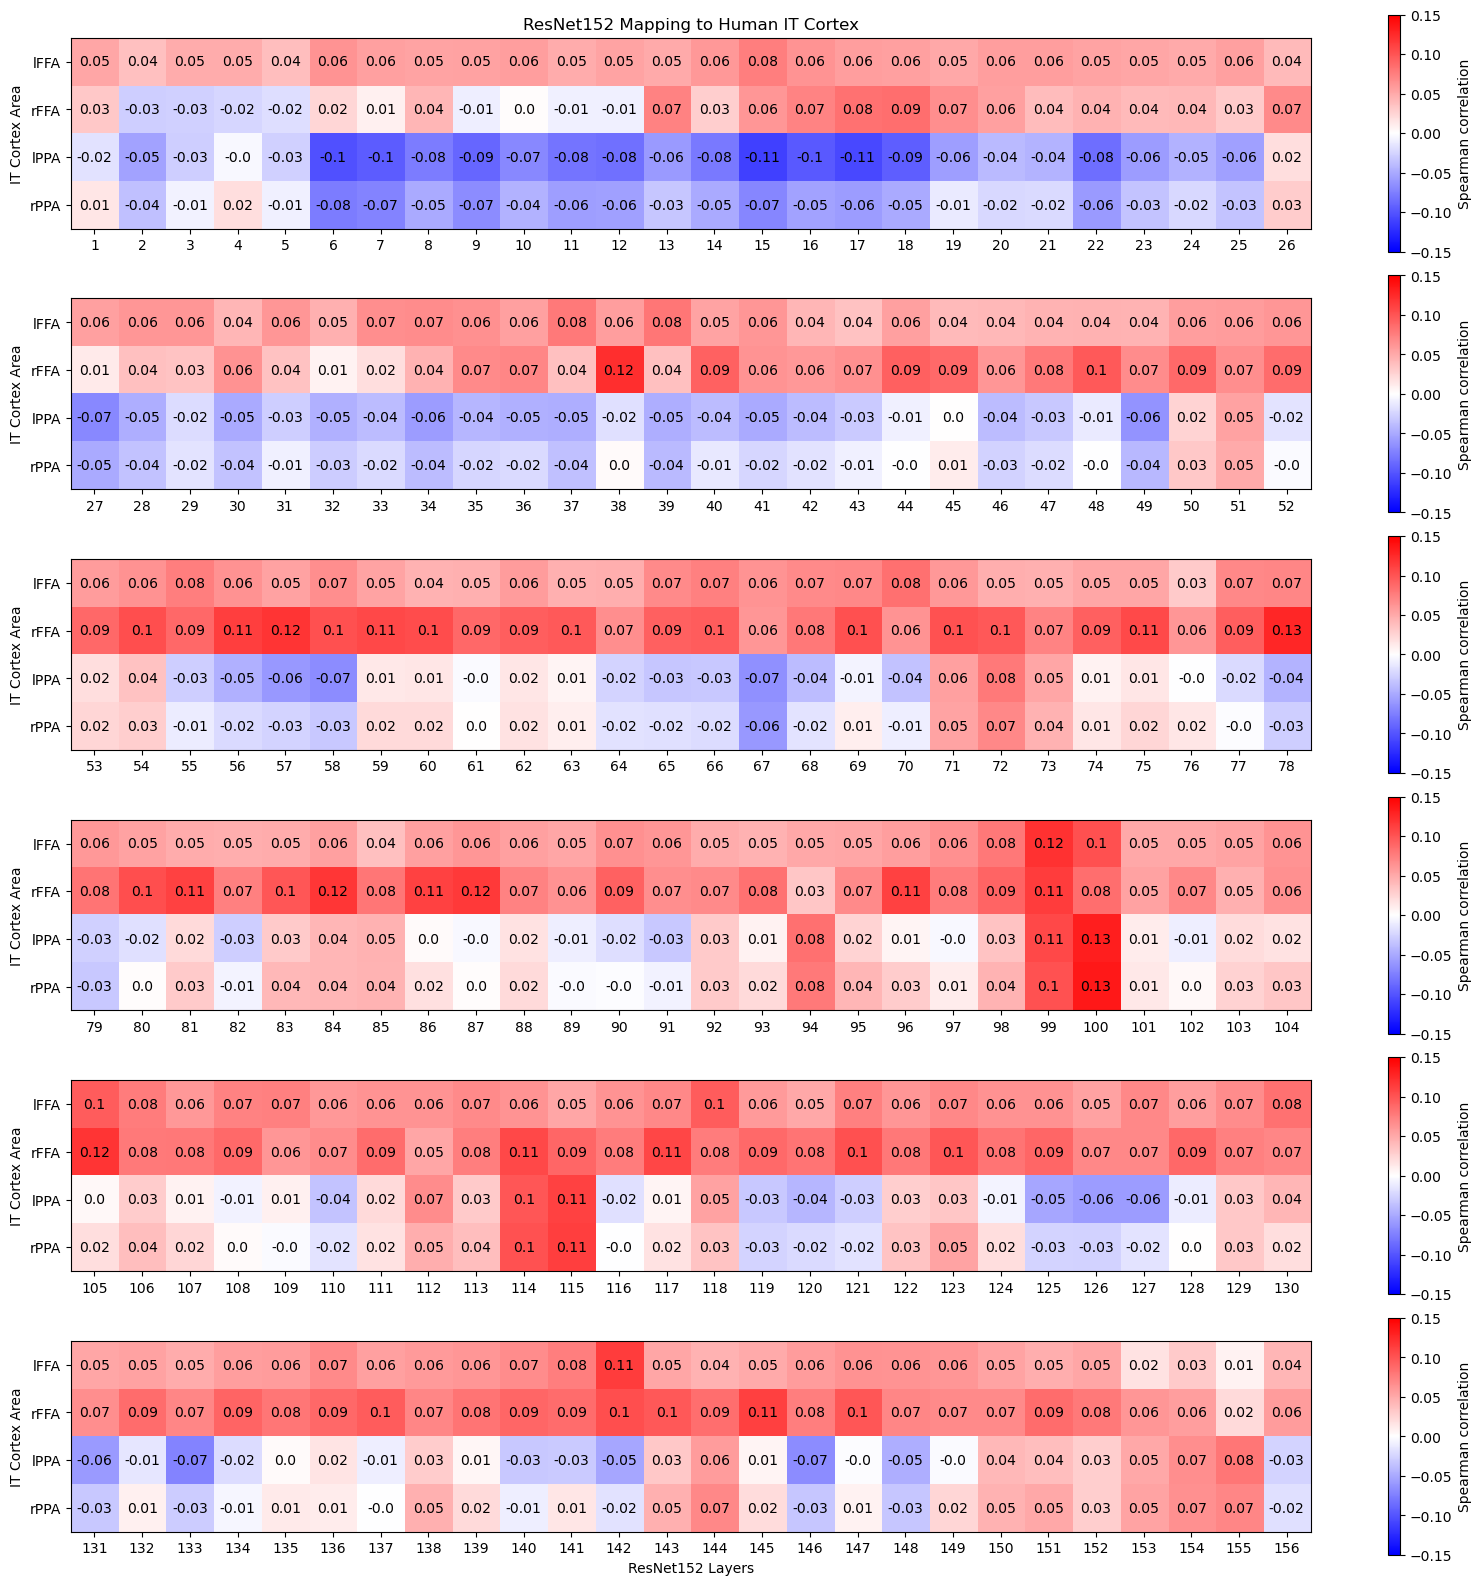

In [31]:
# create plot with subplots
fig, axs = plt.subplots(6,1, figsize=(20, 20))

# FIRST HEATMAP 
data_split1 = rn152_map[:, 0:26]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn152_map[:, 26:52]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(27, 53))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# THIRD HEATMAP
data_split3 = rn152_map[:, 52:78]
hm3 = axs[2].imshow(data_split3, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[2].set_xticks(np.arange(data_split3.shape[1]))
axs[2].set_yticks(np.arange(data_split3.shape[0]))
axs[2].set_xticklabels(np.arange(53, 79))
axs[2].set_yticklabels(ROI_NAMES)
axs[2].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split3.shape[0]):
    for j in range(data_split3.shape[1]):
        axs[2].annotate(str(round(data_split3[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FOURTH HEATMAP
data_split4 = rn152_map[:, 78:104]
hm4 = axs[3].imshow(data_split4, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[3].set_xticks(np.arange(data_split4.shape[1]))
axs[3].set_yticks(np.arange(data_split4.shape[0]))
axs[3].set_xticklabels(np.arange(79, 105))
axs[3].set_yticklabels(ROI_NAMES)
axs[3].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split4.shape[0]):
    for j in range(data_split4.shape[1]):
        axs[3].annotate(str(round(data_split4[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FIFTH HEATMAP
data_split5 = rn152_map[:, 104:130]
hm5 = axs[4].imshow(data_split5, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[4].set_xticks(np.arange(data_split5.shape[1]))
axs[4].set_yticks(np.arange(data_split5.shape[0]))
axs[4].set_xticklabels(np.arange(105, 131))
axs[4].set_yticklabels(ROI_NAMES)
axs[4].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split5.shape[0]):
    for j in range(data_split5.shape[1]):
        axs[4].annotate(str(round(data_split5[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# SIXTH HEATMAP
data_split6 = rn152_map[:, 130:]
hm6 = axs[5].imshow(data_split6, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[5].set_xticks(np.arange(data_split6.shape[1]))
axs[5].set_yticks(np.arange(data_split6.shape[0]))
axs[5].set_xticklabels(np.arange(131, 157))
axs[5].set_yticklabels(ROI_NAMES)
axs[5].set_xlabel('ResNet152 Layers')
axs[5].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split6.shape[0]):
    for j in range(data_split6.shape[1]):
        axs[5].annotate(str(round(data_split6[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')
cbar3 = fig.colorbar(hm3, ax=axs[2])
cbar3.set_label('Spearman correlation')
cbar4 = fig.colorbar(hm4, ax=axs[3])
cbar4.set_label('Spearman correlation')
cbar5 = fig.colorbar(hm4, ax=axs[4])
cbar5.set_label('Spearman correlation')
cbar6 = fig.colorbar(hm5, ax=axs[5])
cbar6.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet152 Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn152_human_map.png'
plt.savefig(save_path)

plt.show()

### ResNet152 (modified)

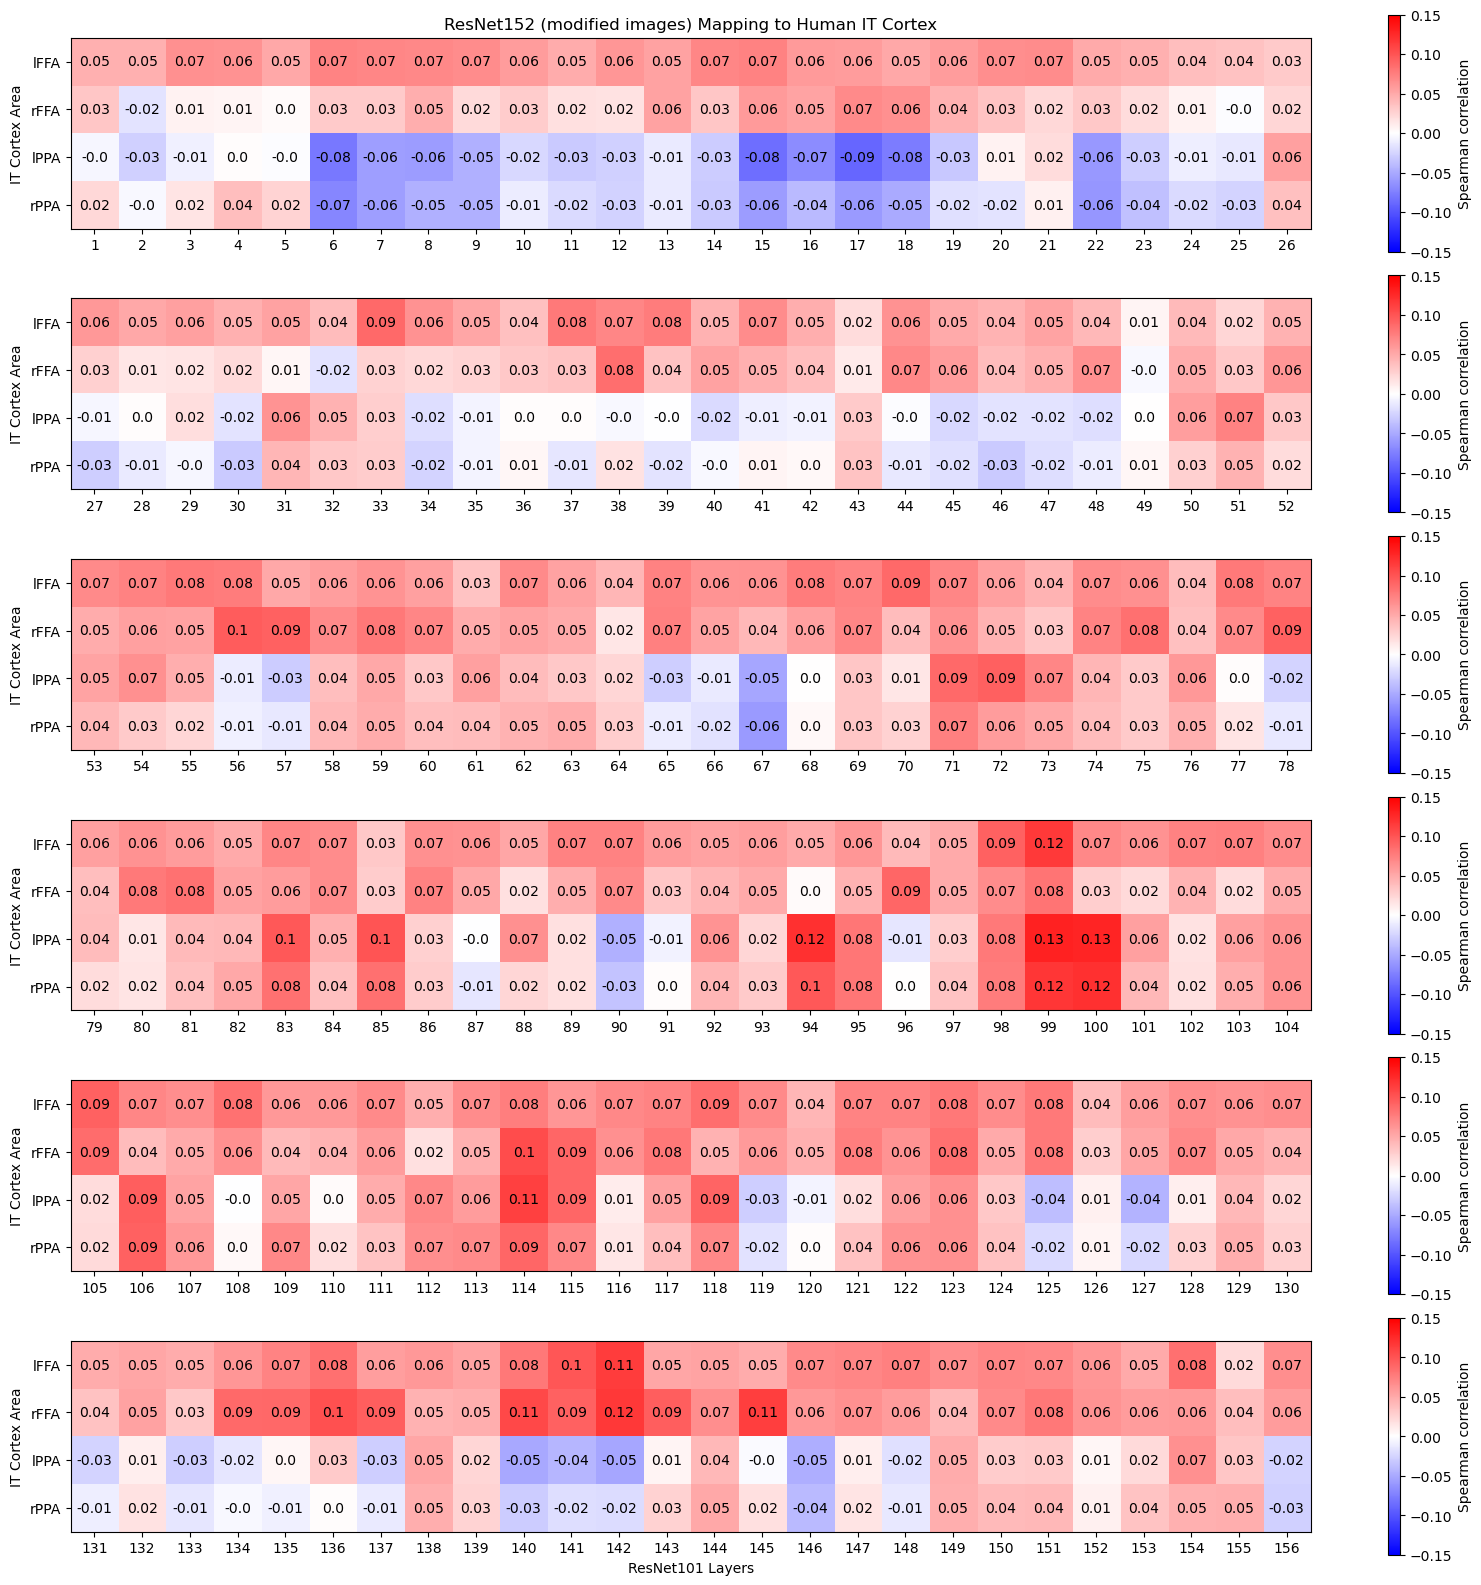

In [32]:
# create plot with subplots
fig, axs = plt.subplots(6,1, figsize=(20, 20))

# FIRST HEATMAP 
data_split1 = rn152_mod_map[:, 0:26]
hm1 = axs[0].imshow(data_split1, cmap='bwr', vmin=-0.15, vmax=0.15)

# add value annotations to each cell
for i in range(data_split1.shape[0]):
    for j in range(data_split1.shape[1]):
        axs[0].annotate(str(round(data_split1[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
    
# set axis labels
axs[0].set_xticks(np.arange(data_split1.shape[1]))
axs[0].set_yticks(np.arange(data_split1.shape[0]))
axs[0].set_xticklabels(np.arange(1,data_split1.shape[1] + 1))
axs[0].set_yticklabels(ROI_NAMES)
axs[0].set_ylabel('IT Cortex Area')

# SECOND HEATMAP
data_split2 = rn152_mod_map[:, 26:52]
hm2 = axs[1].imshow(data_split2, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[1].set_xticks(np.arange(data_split2.shape[1]))
axs[1].set_yticks(np.arange(data_split2.shape[0]))
axs[1].set_xticklabels(np.arange(27, 53))
axs[1].set_yticklabels(ROI_NAMES)
axs[1].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split2.shape[0]):
    for j in range(data_split2.shape[1]):
        axs[1].annotate(str(round(data_split2[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# THIRD HEATMAP
data_split3 = rn152_mod_map[:, 52:78]
hm3 = axs[2].imshow(data_split3, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[2].set_xticks(np.arange(data_split3.shape[1]))
axs[2].set_yticks(np.arange(data_split3.shape[0]))
axs[2].set_xticklabels(np.arange(53, 79))
axs[2].set_yticklabels(ROI_NAMES)
axs[2].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split3.shape[0]):
    for j in range(data_split3.shape[1]):
        axs[2].annotate(str(round(data_split3[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FOURTH HEATMAP
data_split4 = rn152_mod_map[:, 78:104]
hm4 = axs[3].imshow(data_split4, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[3].set_xticks(np.arange(data_split4.shape[1]))
axs[3].set_yticks(np.arange(data_split4.shape[0]))
axs[3].set_xticklabels(np.arange(79, 105))
axs[3].set_yticklabels(ROI_NAMES)
axs[3].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split4.shape[0]):
    for j in range(data_split4.shape[1]):
        axs[3].annotate(str(round(data_split4[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# FIFTH HEATMAP
data_split5 = rn152_mod_map[:, 104:130]
hm5 = axs[4].imshow(data_split5, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[4].set_xticks(np.arange(data_split5.shape[1]))
axs[4].set_yticks(np.arange(data_split5.shape[0]))
axs[4].set_xticklabels(np.arange(105, 131))
axs[4].set_yticklabels(ROI_NAMES)
axs[4].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split5.shape[0]):
    for j in range(data_split5.shape[1]):
        axs[4].annotate(str(round(data_split5[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')
        
# SIXTH HEATMAP
data_split6 = rn152_mod_map[:, 130:]
hm6 = axs[5].imshow(data_split6, cmap='bwr', vmin=-0.15, vmax=0.15)

# set axis labels
axs[5].set_xticks(np.arange(data_split6.shape[1]))
axs[5].set_yticks(np.arange(data_split6.shape[0]))
axs[5].set_xticklabels(np.arange(131, 157))
axs[5].set_yticklabels(ROI_NAMES)
axs[5].set_xlabel('ResNet101 Layers')
axs[5].set_ylabel('IT Cortex Area')

# add value annotations to each cell
for i in range(data_split6.shape[0]):
    for j in range(data_split6.shape[1]):
        axs[5].annotate(str(round(data_split6[i,j], 2)), xy=(j, i),
                    horizontalalignment='center', verticalalignment='center')

# add colorbars
cbar1 = fig.colorbar(hm1, ax=axs[0])
cbar1.set_label('Spearman correlation')
cbar2 = fig.colorbar(hm2, ax=axs[1])
cbar2.set_label('Spearman correlation')
cbar3 = fig.colorbar(hm3, ax=axs[2])
cbar3.set_label('Spearman correlation')
cbar4 = fig.colorbar(hm4, ax=axs[3])
cbar4.set_label('Spearman correlation')
cbar5 = fig.colorbar(hm4, ax=axs[4])
cbar5.set_label('Spearman correlation')
cbar6 = fig.colorbar(hm5, ax=axs[5])
cbar6.set_label('Spearman correlation')

# adjust spacing
plt.subplots_adjust(hspace=0.1)

# add title
axs[0].set_title('ResNet152 (modified images) Mapping to Human IT Cortex')

# save figure
save_path = FIGURE_PATH + '/rn152_human_mod_map.png'
plt.savefig(save_path)

plt.show()

# Compare within-network

## Function to build all three

In [19]:
result_matrix = np.zeros([3, 8, 8])
image_combs = [(0,0), (1, 1), (0,1)]

# fill in result matrix
for i in range(3):
    x, y = image_combs[i]
    for j in range(8):
        for k in range(8):
            result_matrix[i,j,k] = spearmanr(alexnet_rdms[x, j], alexnet_rdms[y, k], axis=None).statistic

In [35]:
def viz_layer_similarity(network_rdms, title='', save=False, save_name='', height=6, width=15):

    # build result matrix
    image_combs = [(0,0), (1, 1), (0,1)]
    n_layers = network_rdms.shape[1]
    result_matrix = np.zeros([len(image_combs), n_layers, n_layers])

    # fill in result matrix
    for i in range(3):
        x, y = image_combs[i]
        for j in range(n_layers):
            for k in range(n_layers):
                result_matrix[i,j,k] = spearmanr(network_rdms[x, j], network_rdms[y, k], axis=None).statistic

    # visualize result matrix
    fig, ax = plt.subplots(1, 3, figsize=(width, height))
    heatmap1 = ax[0].imshow(result_matrix[0], cmap='bwr')
    heatmap2 = ax[1].imshow(result_matrix[1], cmap='bwr')
    heatmap3 = ax[2].imshow(result_matrix[2], cmap='bwr')
    cbar = ax[2].figure.colorbar(heatmap3, ax=ax)
    cbar.set_label('Spearman Correlation')

    # first plot
    ax[0].set_xticks(np.arange(n_layers))
    ax[0].set_yticks(np.arange(n_layers))
    ax[0].set_xticklabels(np.arange(1,n_layers + 1))
    ax[0].set_yticklabels(np.arange(1,n_layers + 1))
    ax[0].set_title('Normal Images')
    ax[0].set_xlabel(f'Layers')
    ax[0].set_ylabel(f'Layers')

    # second plot
    ax[1].set_xticks(np.arange(n_layers))
    ax[1].set_yticks(np.arange(n_layers))
    ax[1].set_xticklabels(np.arange(1,n_layers + 1))
    ax[1].set_yticklabels(np.arange(1,n_layers + 1))
    ax[1].set_title('Modififed Images')
    ax[1].set_xlabel(f'Layers')
    ax[1].set_ylabel(f'Layers')

    # third plot
    ax[2].set_xticks(np.arange(n_layers))
    ax[2].set_yticks(np.arange(n_layers))
    ax[2].set_xticklabels(np.arange(1,n_layers + 1))
    ax[2].set_yticklabels(np.arange(1,n_layers + 1))
    ax[2].set_title('Normal vs Modified Images')
    ax[2].set_xlabel(f'Layers (normal)')
    ax[2].set_ylabel(f'Layers (modified)')

    fig.suptitle(title)

    # save figure
    if save:
        plt.savefig(save_name)
    
    plt.show()

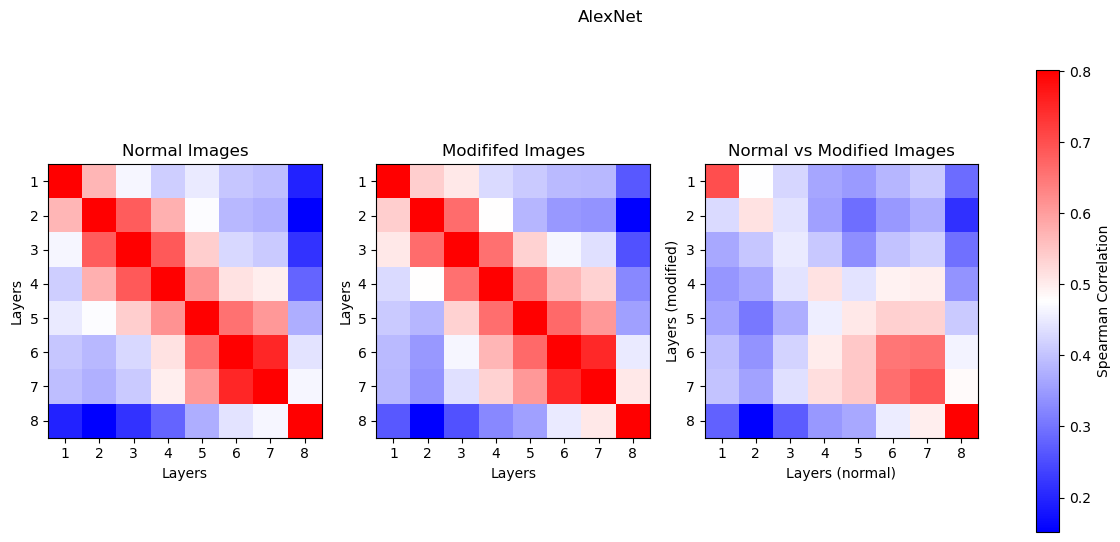

In [36]:
viz_layer_similarity(alexnet_rdms, title='AlexNet', save=True, save_name=FIGURE_PATH + '/alexnet_layer_similarities.png')

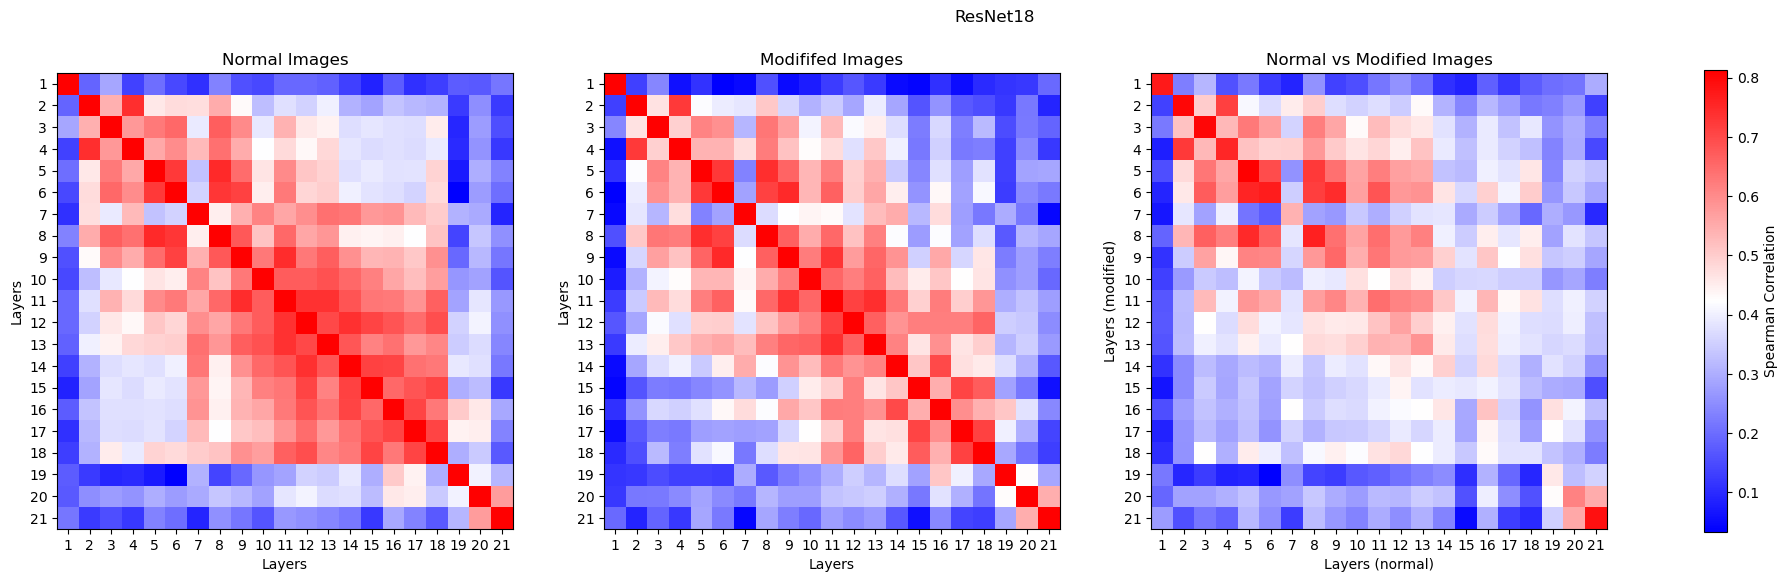

In [43]:
viz_layer_similarity(rn18_rdms, title='ResNet18', width=25, save=True, save_name=FIGURE_PATH + '/rn18_layer_sims.png')

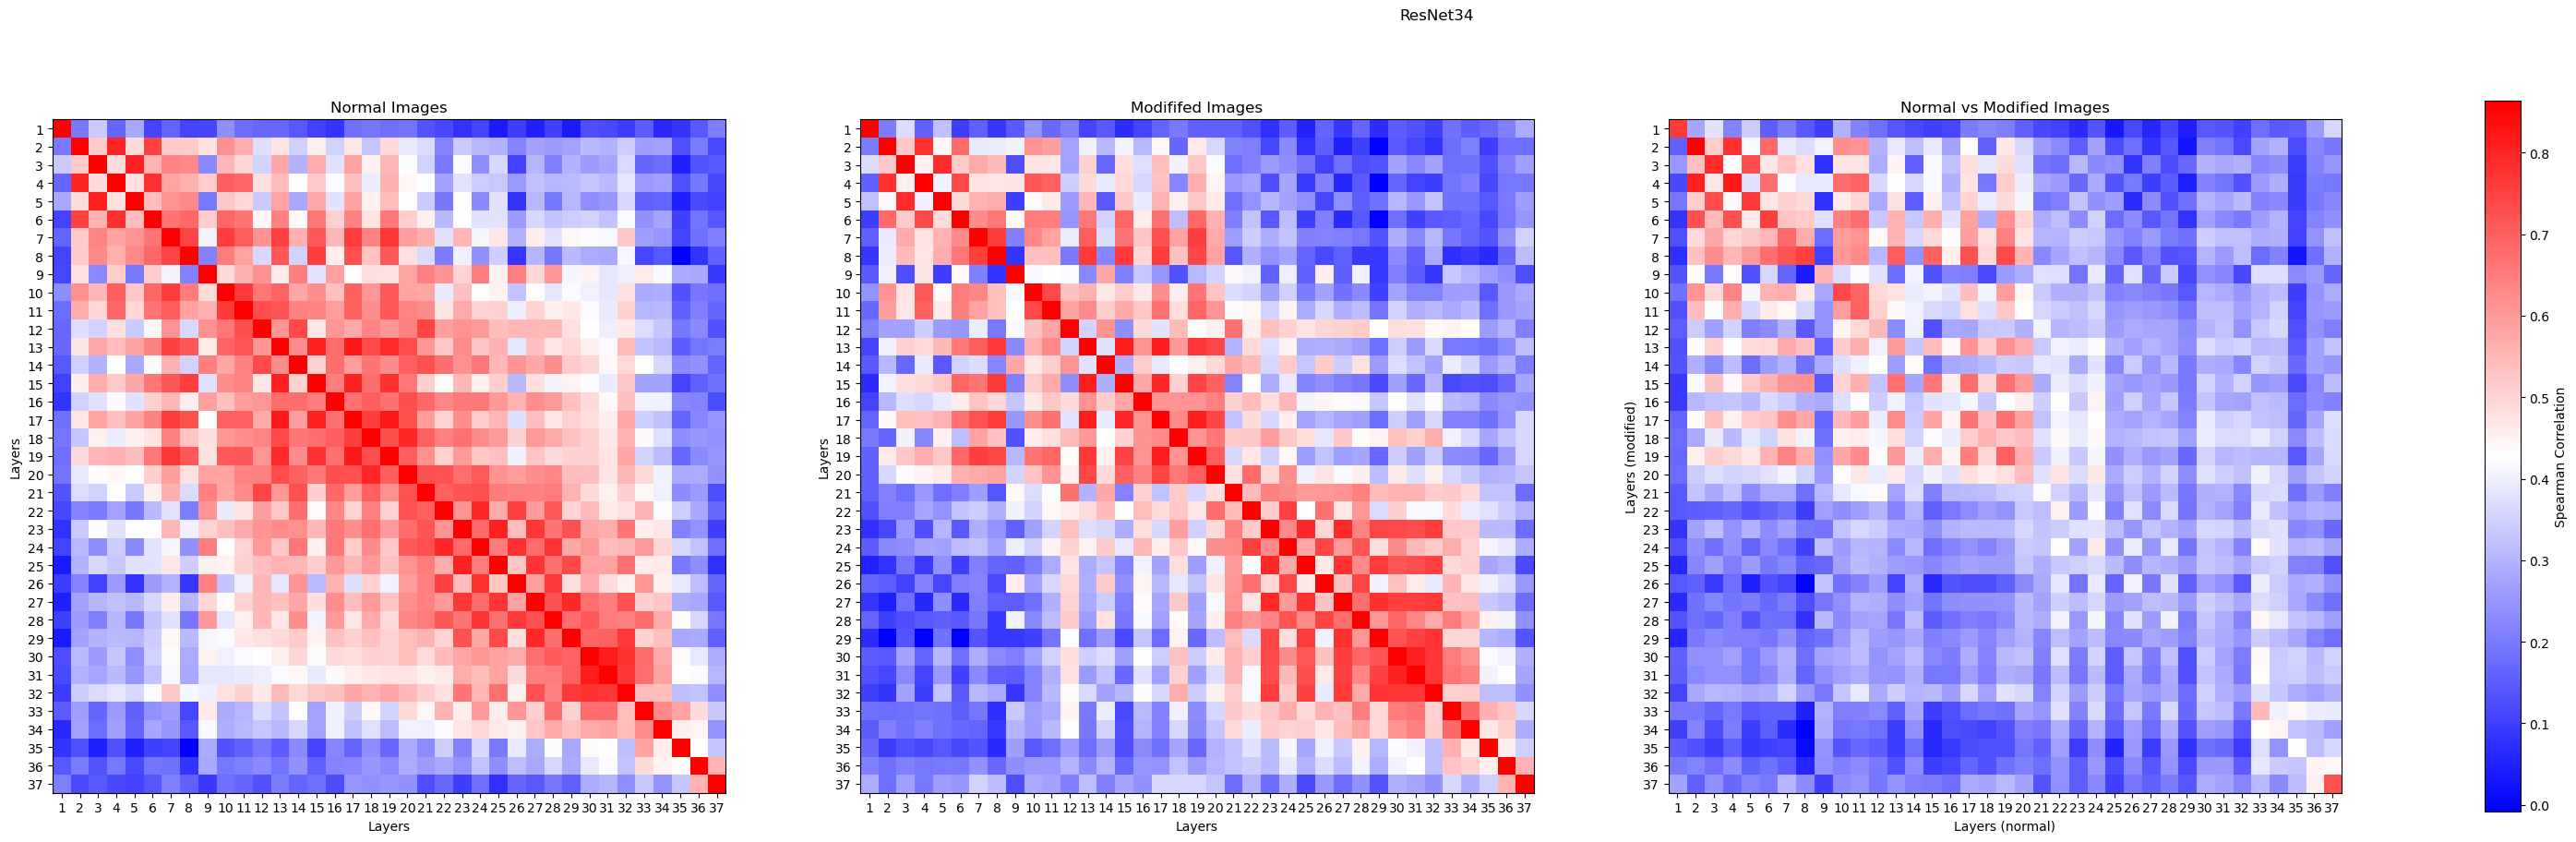

In [44]:
viz_layer_similarity(rn34_rdms, title='ResNet34', width=40, height=10, save=True, save_name=FIGURE_PATH + '/rn34_layer_sims.png')

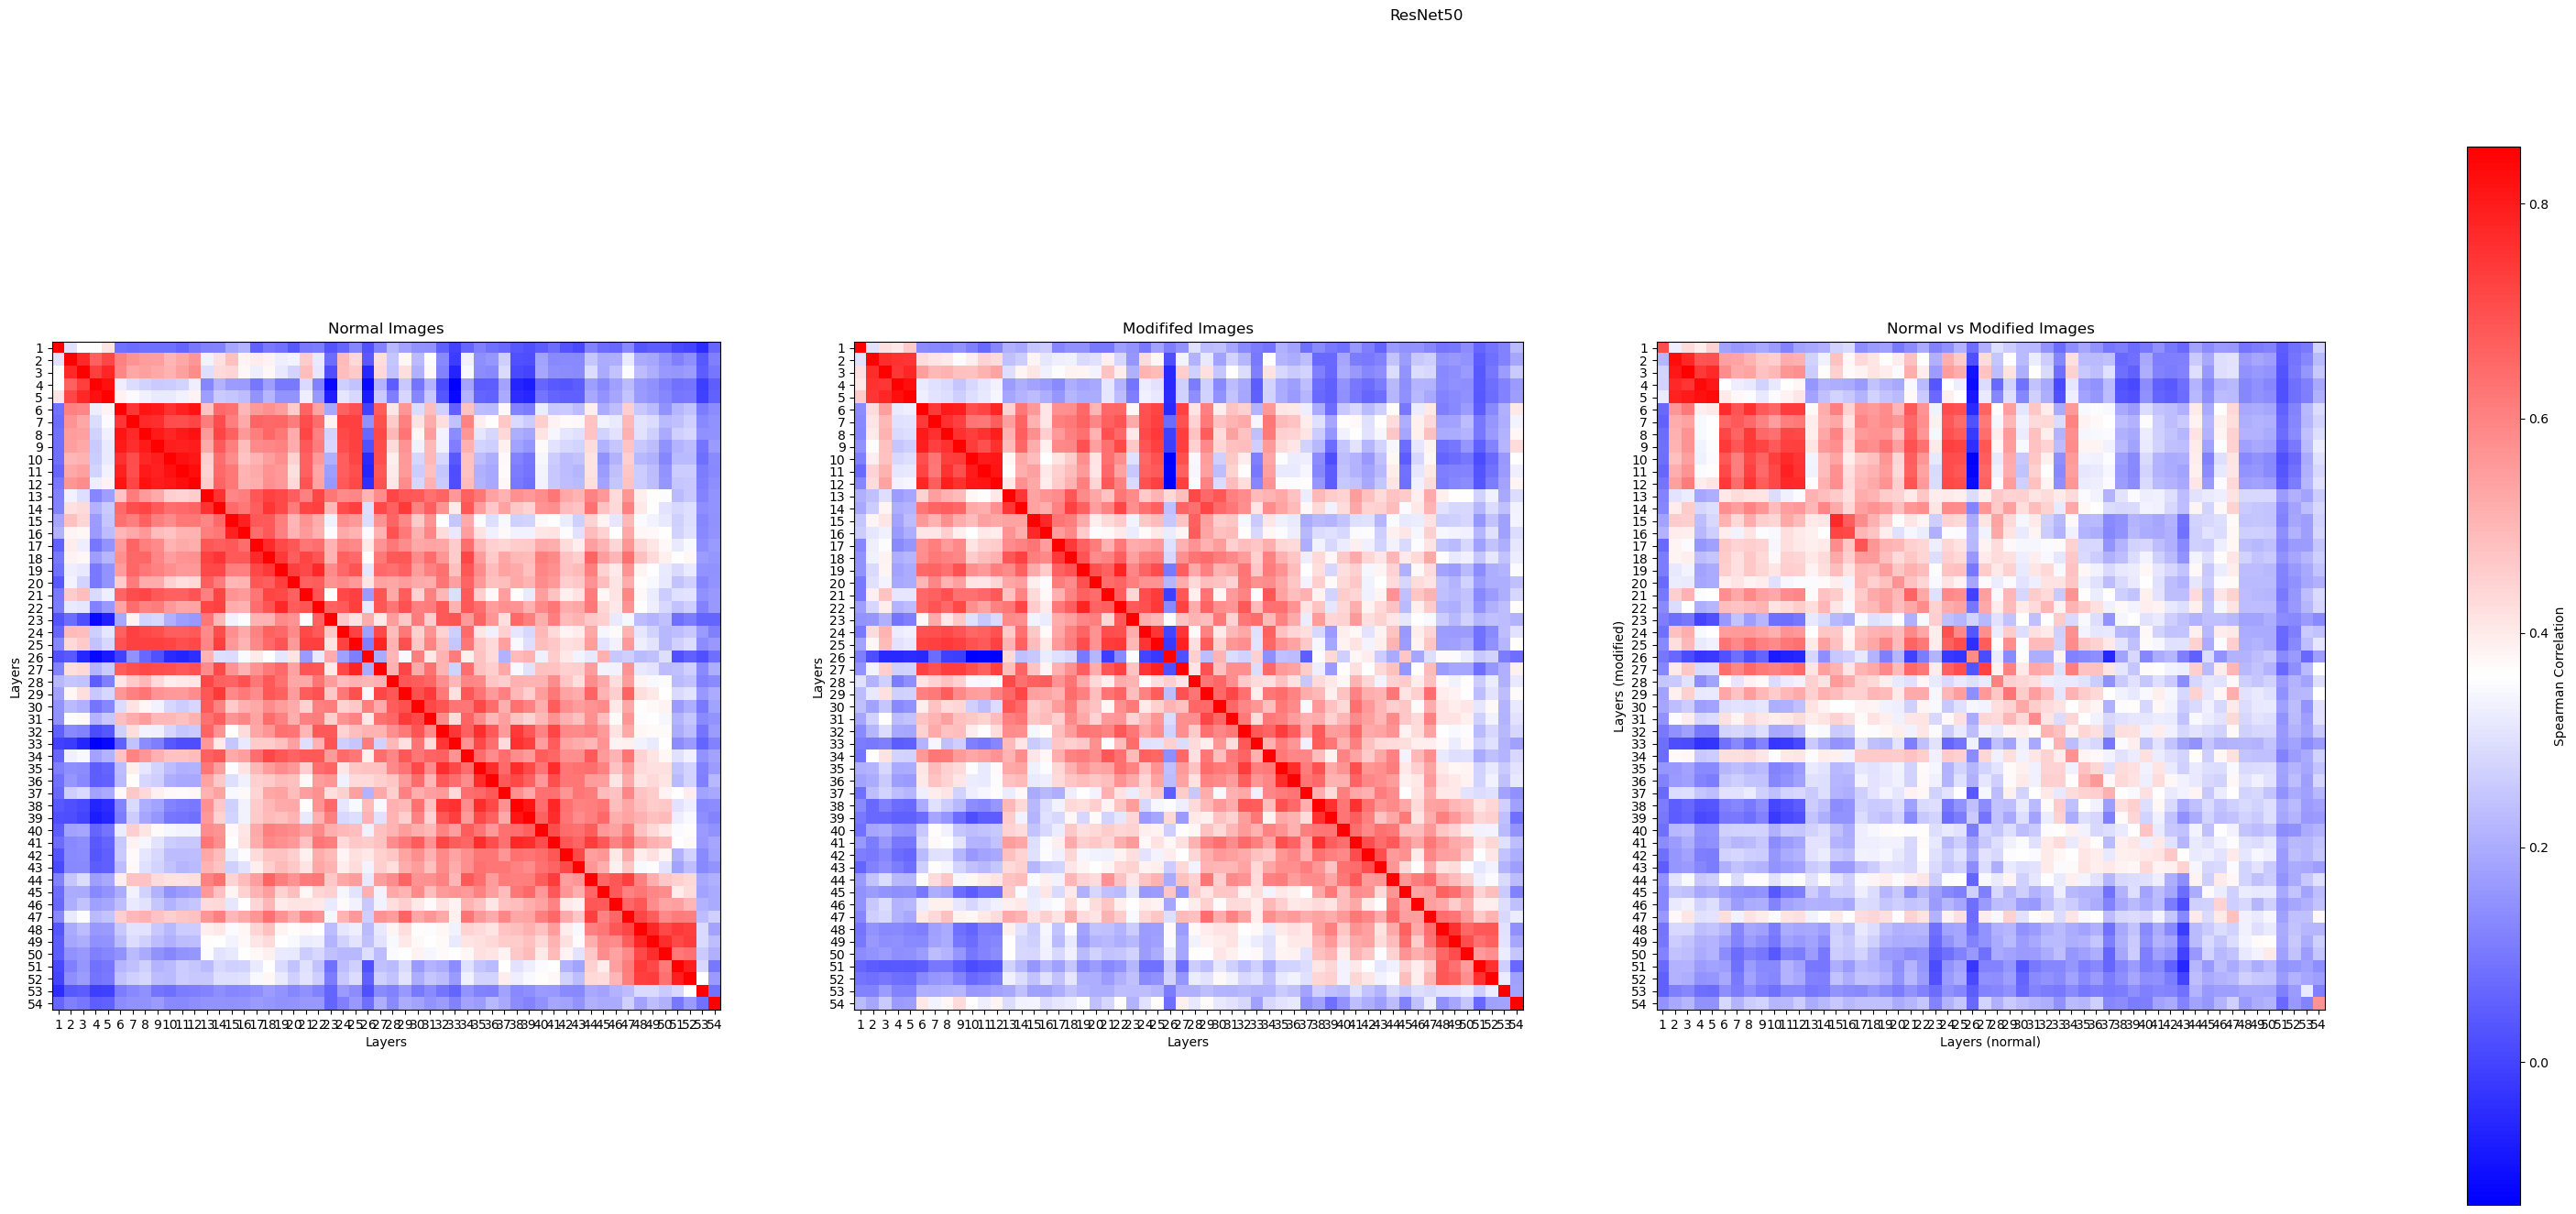

In [48]:
viz_layer_similarity(rn50_rdms, title='ResNet50', width=40, height=15, save=True, save_name=FIGURE_PATH + '/rn50_layer_sims.png')

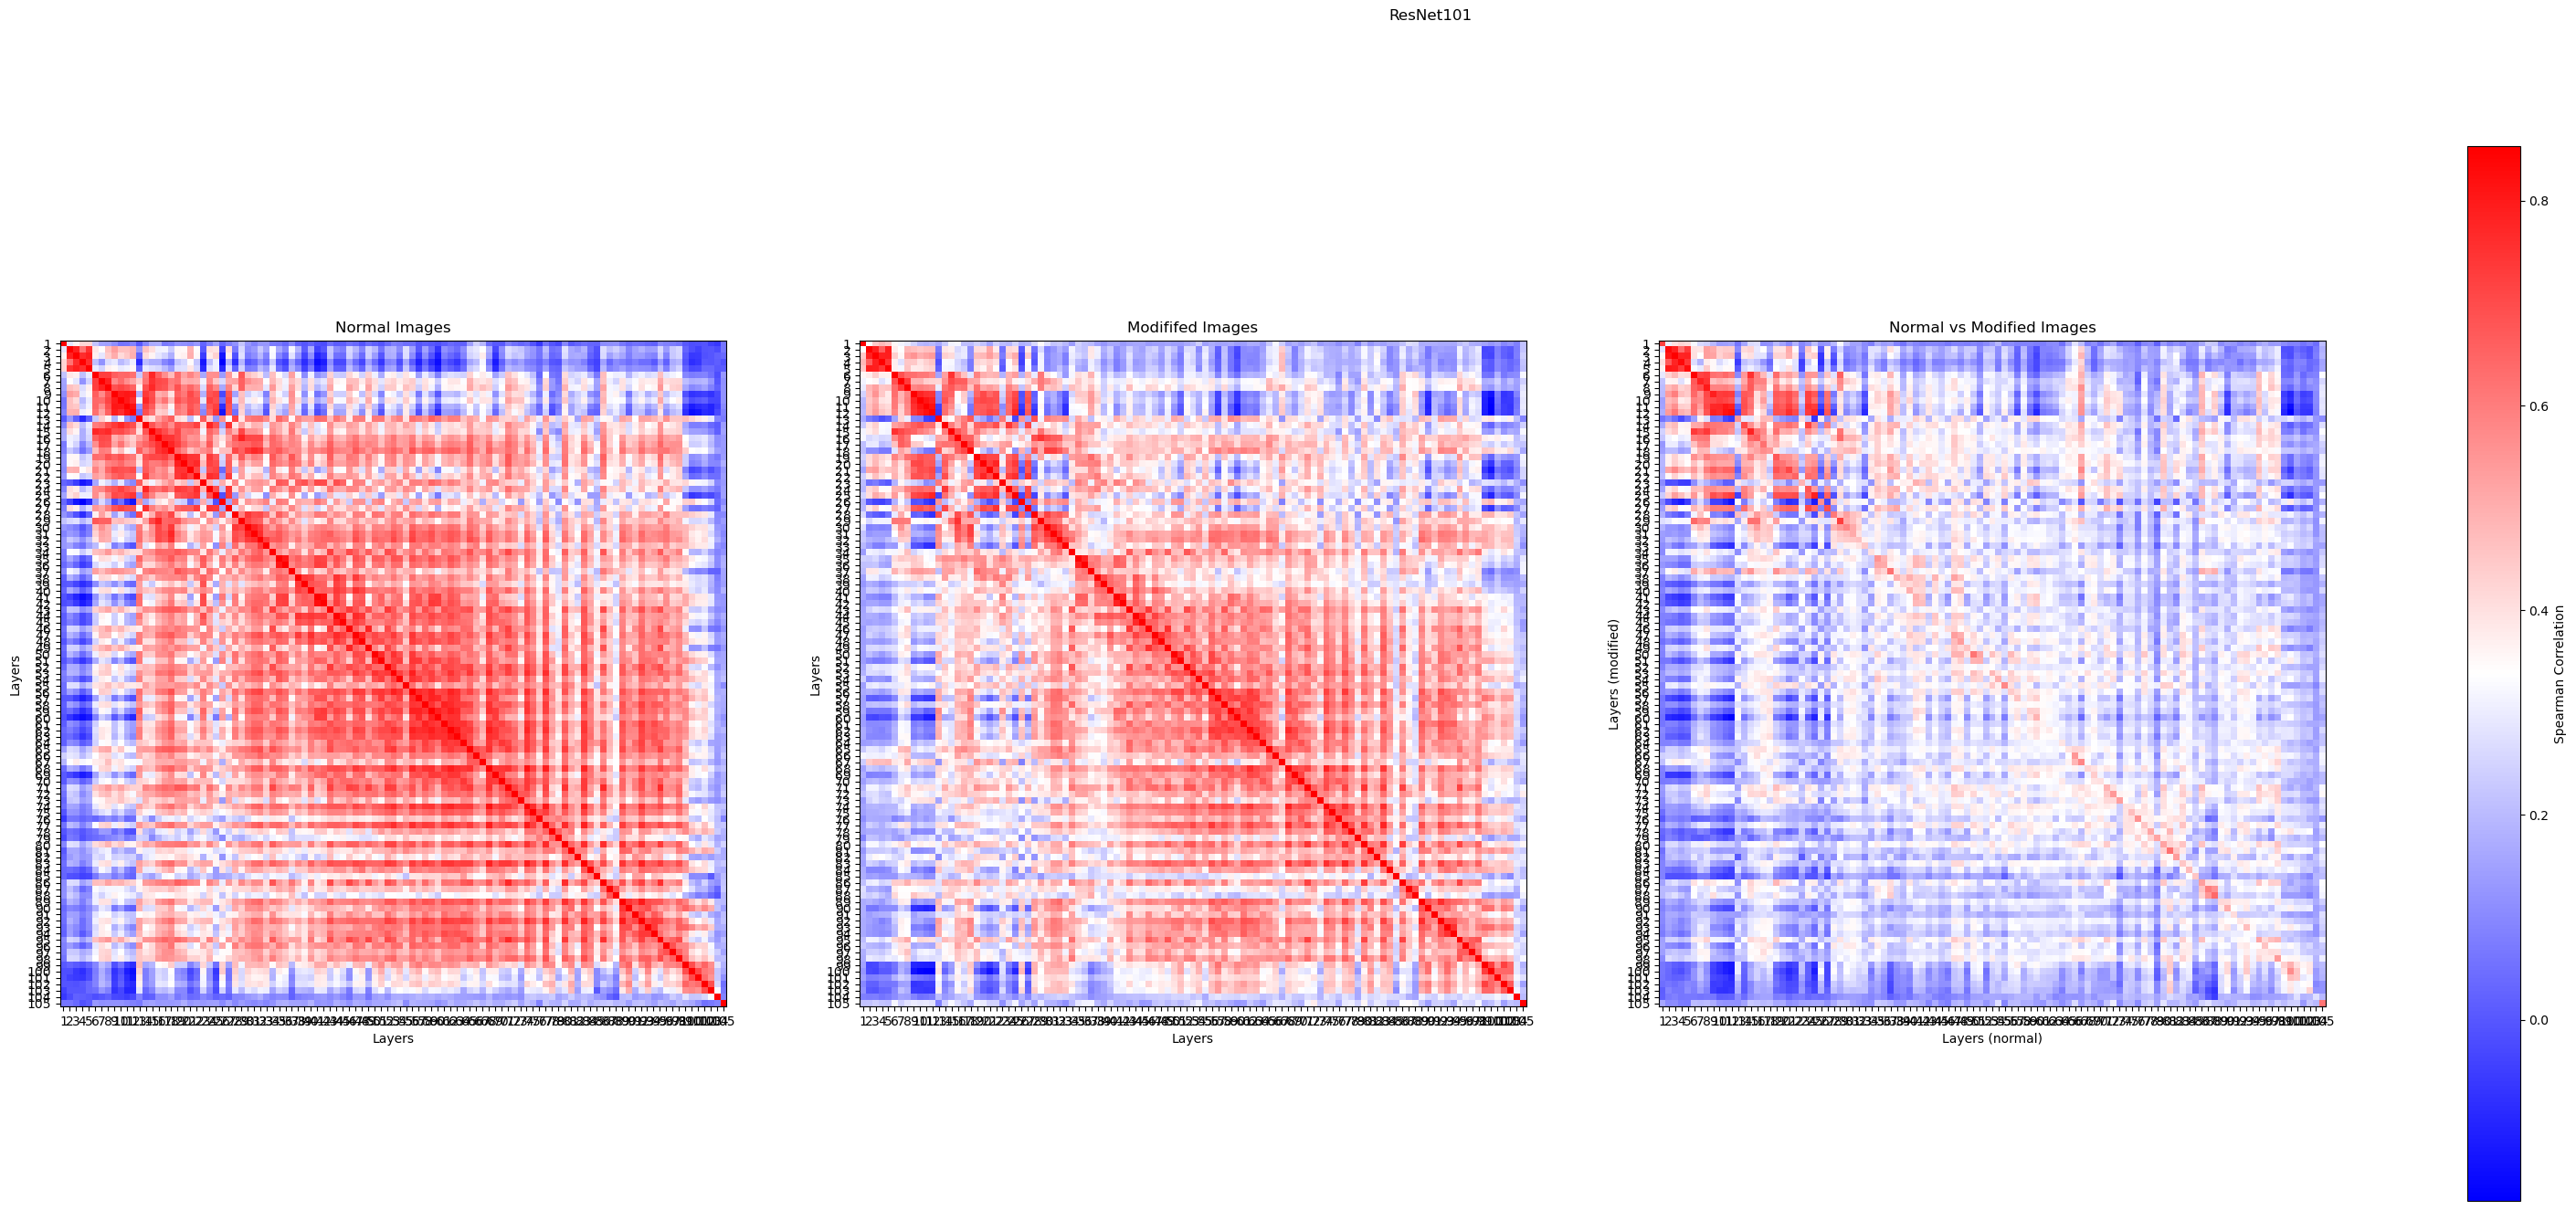

In [52]:
viz_layer_similarity(rn101_rdms, title='ResNet101', width=40, height=15, save=True, save_name=FIGURE_PATH + '/rn101_layer_sims.png')

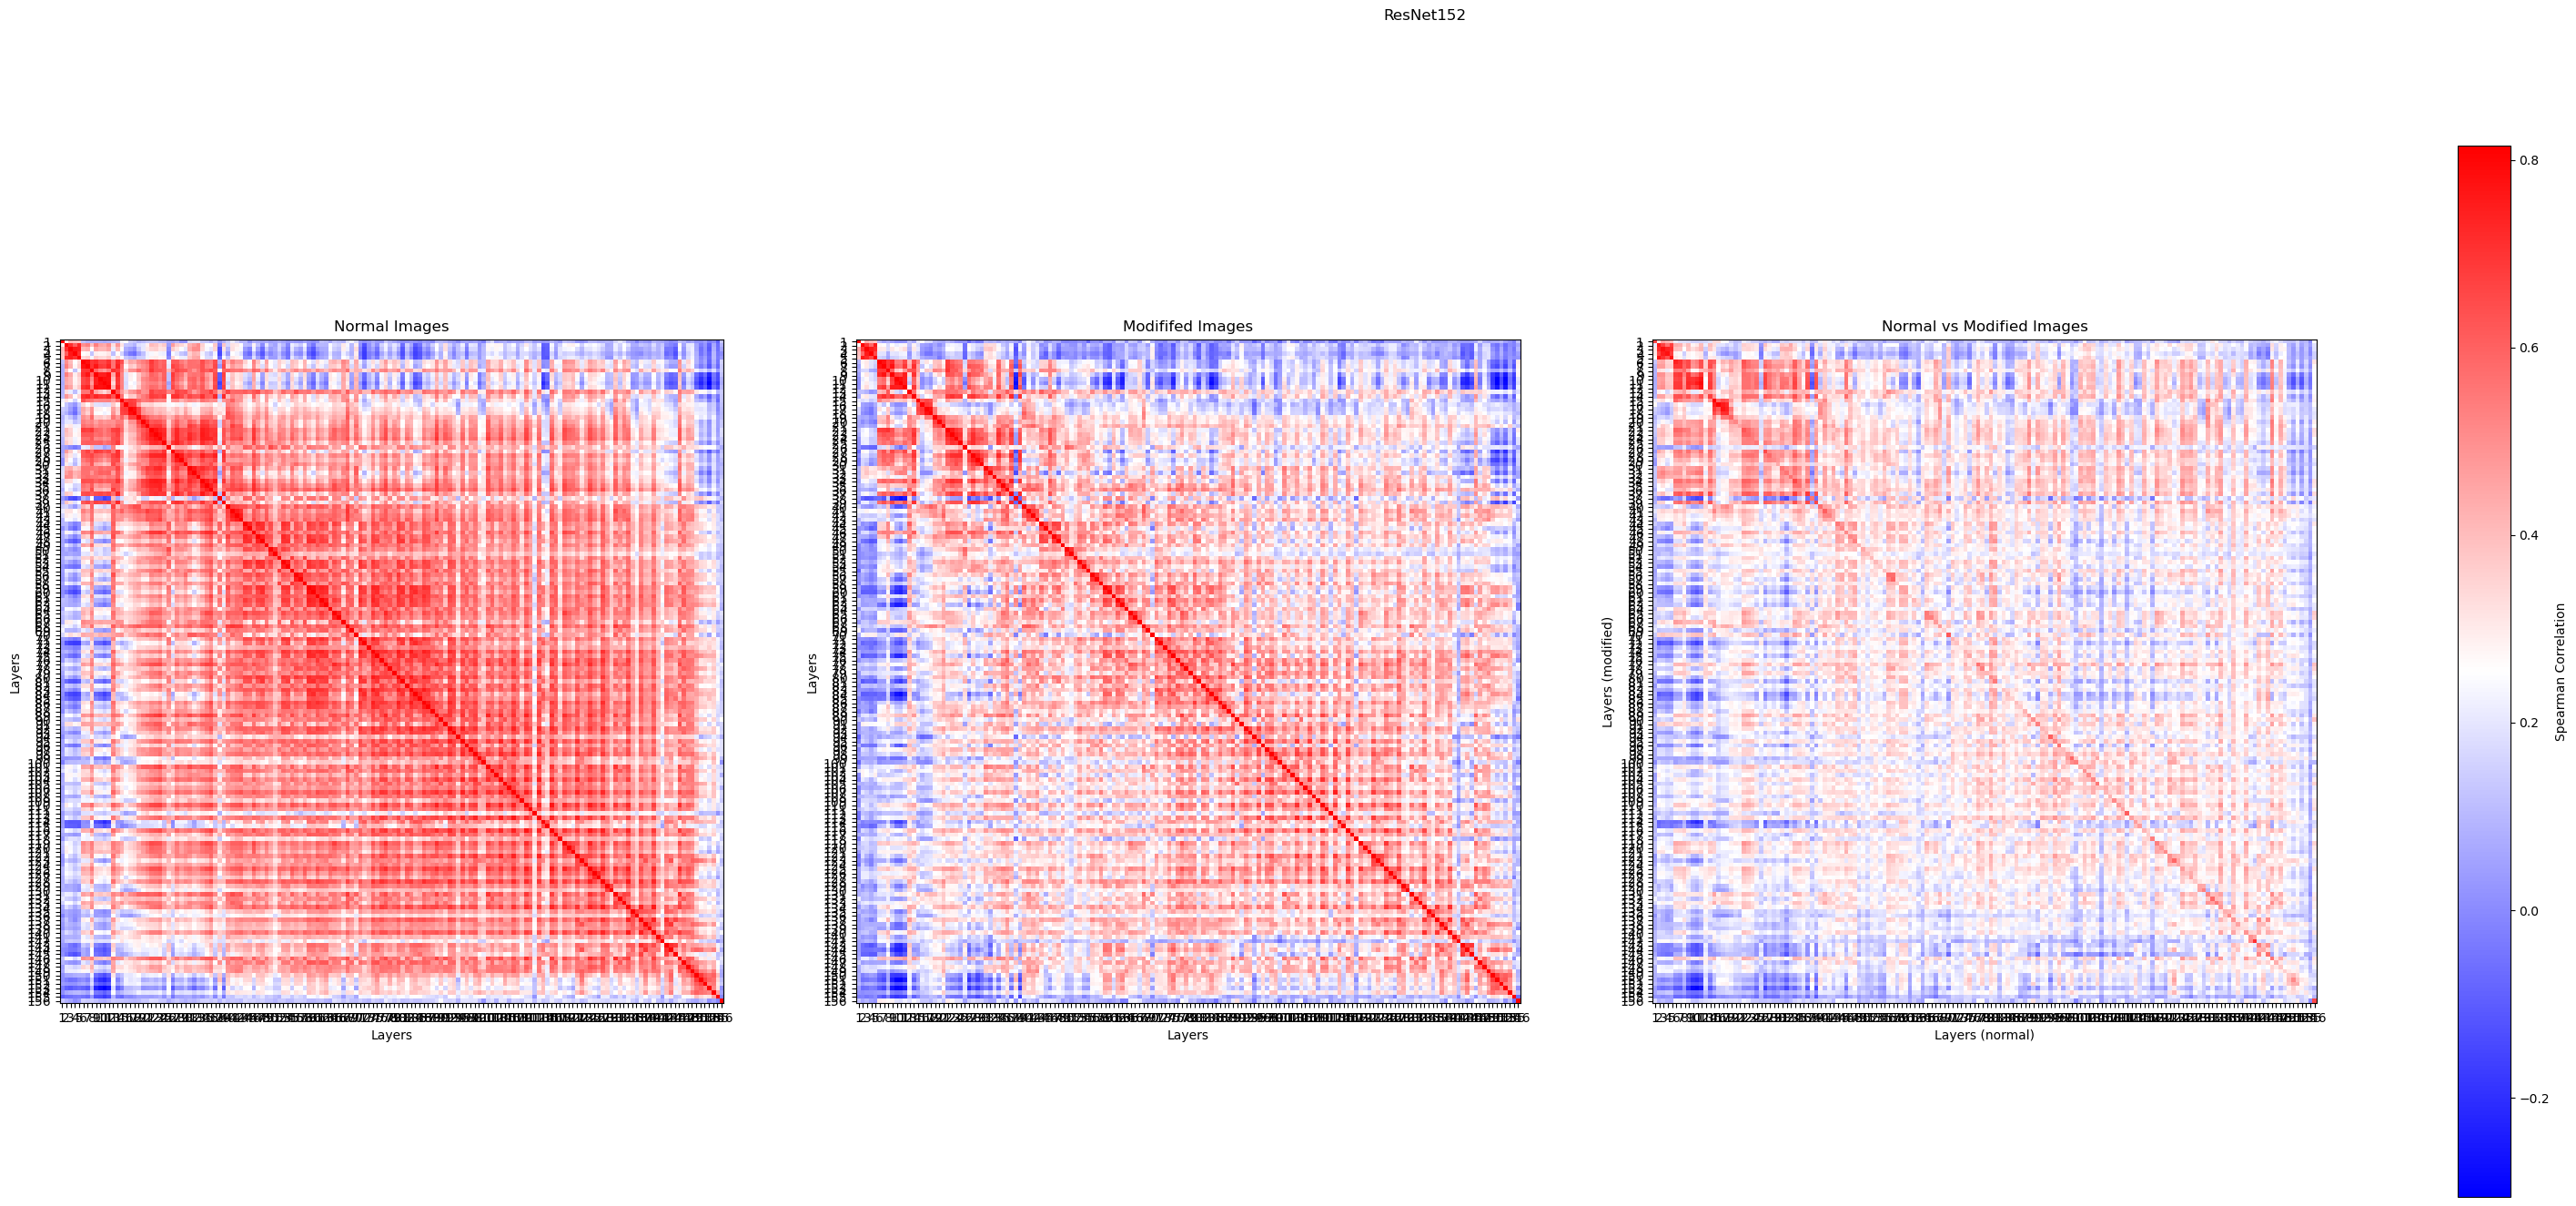

In [53]:
viz_layer_similarity(rn152_rdms, title='ResNet152', width=40, height=15, save=True, save_name=FIGURE_PATH + '/rn152_layer_sims.png')

## Function to build one

In [50]:
def viz_single_layer_similarity(network_rdms, matrix1, matrix2, matrix1_name='', matrix2_name='',
                         title='', save=False, save_name='', height=6, width=6):

    # build result matrix
    n_layers = network_rdms.shape[1]
    result_matrix = np.zeros([n_layers, n_layers])

    # fill in result matrix
    for i in range(n_layers):
        for j in range(n_layers):
            result_matrix[i,j] = spearmanr(network_rdms[matrix1, i], network_rdms[matrix2, j], axis=None).statistic

    # visualize result matrix
    fig, ax = plt.subplots(figsize=(width, height))
    heatmap = ax.imshow(result_matrix, cmap='bwr')
    cbar = ax.figure.colorbar(heatmap, ax=ax)

    # add labels
    cbar.set_label('Spearman Correlation')
    ax.set_xticks(np.arange(n_layers))
    ax.set_yticks(np.arange(n_layers))
    ax.set_xticklabels(np.arange(1,n_layers + 1))
    ax.set_yticklabels(np.arange(1,n_layers + 1))
    ax.set_xlabel(f'Layers ({matrix1_name})')
    ax.set_ylabel(f'Layers ({matrix2_name})')
    ax.set_title(title)

    # save figure
    if save:
        plt.savefig(save_name)
    
    plt.show()

### AlexNet (normal)

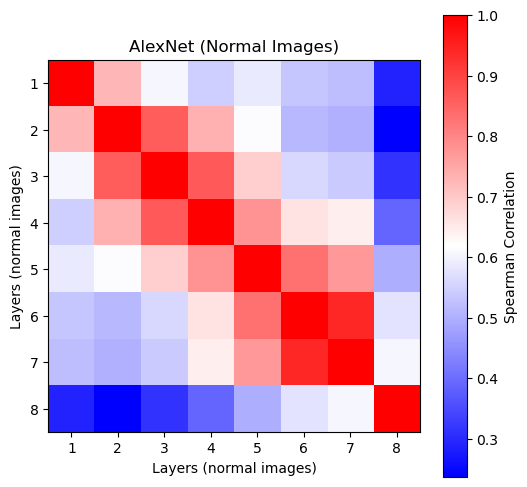

In [51]:
viz_single_layer_similarity(alexnet_rdms, 0, 0, 'normal images', 'normal images',
                     'AlexNet (Normal Images)', save=True, save_name=FIGURE_PATH + '/alexnet_normal_layers.png')